
# Import Necessary Libraries


# Import libraries

In [1]:
import os 
print("hi")

hi


In [2]:
pip install seaborn


You should consider upgrading via the '/home/hifis/hifis0010/thesis/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [45]:
'''
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118
!pip install pandas matplotlib pillow torch torchvision scikit-learn tqdm seaborn
'''

'\n!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118\n!pip install pandas matplotlib pillow torch torchvision scikit-learn tqdm seaborn\n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch.nn.functional as F
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
#from natsort import natsorted # type: ignore
from sklearn.model_selection import GroupShuffleSplit
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import DataLoader, WeightedRandomSampler
from torch.utils.data import WeightedRandomSampler
import seaborn as sns
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models
import time
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.metrics import precision_score as skl_precision_score
from sklearn.metrics import recall_score as skl_recall_score
from sklearn.metrics import f1_score as skl_f1_score
from sklearn.metrics import accuracy_score as skl_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import random
import warnings
import shutil
# Save metrics dictionary (H) after training completes
import pickle
import os


# Import the code from all .py files

from custom_dataset import CustomMelanomaDataset  # Import the custom dataset
from resnet_model import ResNetModel
from preprocessing_csv import PreprocessingCSV
from train_test_loop import train_and_test
from lesion_predictions import LesionPredictions
from FocalLoss import FocalLoss
#from malignant_augmentation import TrainMalignantAugmentor, TestMalignantAugmentor


In [3]:
warnings.filterwarnings("ignore")


In [4]:
# Define the dynamic root path
BASE_DIR = "/home/hifis/hifis0010"

# Create the full path to the CSV file
csv_path = os.path.join(BASE_DIR, 'Thesis_Hafeez/Dataset/Train_JPEG/ISIC_2020_Training_GroundTruth.csv')

# Load the CSV file
df = pd.read_csv(csv_path)

# Display the first few rows of the dataset
print(df.head())

# Display the structure of the dataset
print(df.info())


     image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  
0   unknown           benign     0.0  
1   unknown           benign     0.0  
2     nevus           benign     0.0  
3   unknown           benign     0.0  
4   unknown           benign     0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null 

In [5]:
# Define the dynamic root path
BASE_DIR = "/home/hifis/hifis0010"

# Step 1: Define the universal path handling logic
SPLIT_CSV_DIR = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv')

# Universal Path Setup for Images
IMAGE_DIR = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'Train_JPEG', 'JPEG')

# Paths for Train/Test CSVs
TRAIN_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_split.csv')
TEST_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'test_split.csv')

# Create the full path to the CSV file
CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez/Dataset/Train_JPEG/ISIC_2020_Training_GroundTruth.csv')
preprocess_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez/Dataset/Train_JPEG/ISIC_2020_Training_GroundTruth_preprocess.csv')

# to overcome class imbalance
TRAIN_CSV_PASS1 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass1.csv')
TRAIN_CSV_PASS2 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass2.csv')

# save model after training/testing
MODEL_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez',  'Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results', 'output')

#save metrics dictionary
# Set a specific directory to save the file
Metrics_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez',  'Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results', 'output')

# save the plot PNG
PLOT_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez',  'Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results', 'output')


In [53]:
'''
# Step : Create an instance of PreprocessingCSV
preprocessor = PreprocessingCSV(csv_path, BASE_DIR)

# Step : Execute the preprocessing steps
preprocessor.analyze_raw_data()
preprocessor.check_for_anomalies()
preprocessor.clean_data()
preprocessor.save_clean_data()
preprocessor.split_by_patient_id()
preprocessor.verify_preprocessed_data()
'''


 
 Unique values in 'anatom_site_general_challenge': ['head/neck' 'upper extremity' 'lower extremity' 'torso' 'nan'
 'lower extremityi wrote to him' 'palms/soles' 'oral/genital']

 
 Rows with variations of 'unknown':
 Empty DataFrame
Columns: [image_name, patient_id, sex, age_approx, anatom_site_general_challenge, diagnosis, benign_malignant, target]
Index: []

 
 Unique values in 'anatom_site_general_challenge' after cleanup: ['head/neck' 'upper extremity' 'lower extremity' 'torso' 'unknown'
 'palms/soles' 'oral/genital']

 
 NaN values in each column:
 image_name                        0
patient_id                        0
sex                              65
age_approx                       68
anatom_site_general_challenge     0
diagnosis                         0
benign_malignant                  0
target                            1
dtype: int64


 Infinity values in each column:
 image_name                       0
patient_id                       0
sex                           

# Ratio of dataset. Analysis of Benign/Malignant in dataset

In [54]:
'''
def count_targets(csv_path):
    df = pd.read_csv(csv_path)
    benign_count = df[df['target'] == 0].shape[0]
    malignant_count = df[df['target'] == 1].shape[0]
    return benign_count, malignant_count

# Count targets in the training dataset
train_benign_count, train_malignant_count = count_targets(TRAIN_CSV_PATH)
print(f"Targets in training dataset:\nBenign (0.0): {train_benign_count}\nMalignant (1.0): {train_malignant_count}")

# Count targets in the test dataset
test_benign_count, test_malignant_count = count_targets(TEST_CSV_PATH)
print(f"\nTargets in test dataset:\nBenign (0.0): {test_benign_count}\nMalignant (1.0): {test_malignant_count}")

Targets in training dataset:
Benign (0.0): 23861
Malignant (1.0): 439

Targets in test dataset:
Benign (0.0): 8094
Malignant (1.0): 136


# Creating offline Augmentations for traing and test dataset to overcome class imbalance



# Ratio after Augmemntation of target Benign/Malignants in dataset

Here must run malignant_augmentation.py seperately.or run once here after all its purpose is served so never run


In [6]:
print(TRAIN_CSV_PATH)
print(IMAGE_DIR)
print(TEST_CSV_PATH)

/home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_split.csv
/home/hifis/hifis0010/Thesis_Hafeez/Dataset/Train_JPEG/JPEG
/home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/test_split.csv


In [56]:
'''

class TrainMalignantAugmentor:
    def __init__(self, train_aug_csv, image_dir, augmentations_per_image=15):
        self.train_aug_csv = train_aug_csv
        self.image_dir = image_dir
        self.augmentations_per_image = augmentations_per_image
        self.data = pd.read_csv(self.train_aug_csv)
        self.original_data_length = len(self.data)
        
        # Define the augmentation transformations
        self.augment_transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
            transforms.ToTensor()
        ])

    def augment_image(self, image_path, image_name_prefix):
        """
        Perform augmentations on a given image and return augmented images with new metadata entries.
        """
        try:
            original_image = Image.open(image_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            return []

        augmented_entries = []

        for i in range(1, self.augmentations_per_image + 1):
            augmented_image = self.augment_transform(original_image)
            # Save with .jpg extension
            augmented_image_name = f"{image_name_prefix}_aug_{i}.jpg"  # Add .jpg extension
            augmented_image_path = os.path.join(self.image_dir, augmented_image_name)

            # Save augmented image
            transforms.ToPILImage()(augmented_image).save(augmented_image_path, format='JPEG')

            # Create metadata entry for the augmented image with .jpg extension
            augmented_entries.append(augmented_image_name)  # Add .jpg extension in metadata

        return augmented_entries

    def perform_augmentation(self):
        augmented_metadata = []

        with tqdm(total=self.original_data_length, desc="Performing Image Augmentation", unit="image") as pbar:
            for idx in range(self.original_data_length):
                row = self.data.iloc[idx]
                image_name = row['image_name']
                benign_malignant = row['benign_malignant']

                # Skip already augmented images
                if "_aug_" in image_name:
                    pbar.update(1)
                    continue

                # Only augment malignant cases
                if benign_malignant == 'malignant':
                    image_path = os.path.join(self.image_dir, image_name)

                    # Check if the file exists
                    if not os.path.exists(image_path):
                        print(f"Image not found: {image_path}")
                        pbar.update(1)
                        continue

                    augmented_image_names = self.augment_image(image_path, image_name)

                    # Append metadata for augmented images
                    for aug_image_name in augmented_image_names:
                        augmented_row = row.copy()
                        augmented_row['image_name'] = aug_image_name  # Include .jpg extension
                        augmented_metadata.append(augmented_row)

                pbar.update(1)

        # Append augmented metadata to the original DataFrame
        augmented_metadata_df = pd.DataFrame(augmented_metadata)
        self.data = pd.concat([self.data, augmented_metadata_df], ignore_index=True)

        print("Image augmentations for training dataset is complete.")

    def save_updated_metadata(self):
        """Save the updated metadata to the original CSV file."""
        self.data.to_csv(self.train_aug_csv, index=False)
        print(f"Updated metadata saved to {self.train_aug_csv}")
        print("Process finished successfully.")


class TestMalignantAugmentor:
    def __init__(self, test_aug_csv, image_dir, augmentations_per_image=10):
        self.test_aug_csv = test_aug_csv
        self.image_dir = image_dir
        self.augmentations_per_image = augmentations_per_image
        self.data = pd.read_csv(self.test_aug_csv)
        self.original_data_length = len(self.data)
        
        # Define the augmentation transformations
        self.augment_transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
            transforms.ToTensor()
        ])

    def augment_image(self, image_path, image_name_prefix):
        """
        Perform augmentations on a given image and return augmented images with new metadata entries.
        """
        try:
            original_image = Image.open(image_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            return []

        augmented_entries = []

        for i in range(1, self.augmentations_per_image + 1):
            augmented_image = self.augment_transform(original_image)
            # Save with .jpg extension
            augmented_image_name = f"{image_name_prefix}_aug_{i}.jpg"  # Add .jpg extension
            augmented_image_path = os.path.join(self.image_dir, augmented_image_name)

            # Save augmented image
            transforms.ToPILImage()(augmented_image).save(augmented_image_path, format='JPEG')

            # Create metadata entry for the augmented image with .jpg extension
            augmented_entries.append(augmented_image_name)  # Add .jpg extension in metadata

        return augmented_entries

    def perform_augmentation(self):
        augmented_metadata = []

        with tqdm(total=self.original_data_length, desc="Performing Image Augmentation (Test)", unit="image") as pbar:
            for idx in range(self.original_data_length):
                row = self.data.iloc[idx]
                image_name = row['image_name']
                benign_malignant = row['benign_malignant']

                # Skip already augmented images
                if "_aug_" in image_name:
                    pbar.update(1)
                    continue

                # Only augment malignant cases
                if benign_malignant == 'malignant':
                    image_path = os.path.join(self.image_dir, image_name)

                    # Check if the file exists
                    if not os.path.exists(image_path):
                        print(f"Image not found: {image_path}")
                        pbar.update(1)
                        continue

                    augmented_image_names = self.augment_image(image_path, image_name)

                    # Append metadata for augmented images
                    for aug_image_name in augmented_image_names:
                        augmented_row = row.copy()
                        augmented_row['image_name'] = aug_image_name  # Include .jpg extension
                        augmented_metadata.append(augmented_row)

                pbar.update(1)

        # Append augmented metadata to the original DataFrame
        augmented_metadata_df = pd.DataFrame(augmented_metadata)
        self.data = pd.concat([self.data, augmented_metadata_df], ignore_index=True)

        print("Image augmentations for test dataset is complete.")

    def save_updated_metadata(self):
        """Save the updated metadata to the original CSV file."""
        self.data.to_csv(self.test_aug_csv, index=False)
        print(f"Updated metadata saved to {self.test_aug_csv}")
        print("Process finished successfully.")
'''

In [57]:
'''
# Initialize the augmentor for training data
train_augmentor = TrainMalignantAugmentor(
        train_aug_csv=TRAIN_CSV_PATH,
        image_dir=IMAGE_DIR)

# Perform augmentation and save the updated metadata for training
train_augmentor.perform_augmentation()
train_augmentor.save_updated_metadata()
'''

Performing Image Augmentation: 100%|██████████| 24300/24300 [1:24:55<00:00,  4.77image/s]  


Image augmentations for training dataset is complete.
Updated metadata saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_split.csv
Process finished successfully.


In [58]:
'''
# Initialize the augmentor for test data
test_augmentor = TestMalignantAugmentor(
        test_aug_csv=TEST_CSV_PATH,
        image_dir=IMAGE_DIR)

# Perform augmentation and save the updated metadata for testing
test_augmentor.perform_augmentation()
test_augmentor.save_updated_metadata()
'''

Performing Image Augmentation (Test): 100%|██████████| 8230/8230 [17:36<00:00,  7.79image/s]


Image augmentations for test dataset is complete.
Updated metadata saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/test_split.csv
Process finished successfully.


# Ratio after Augmemntation of target Benign/Malignants in dataset

In [7]:
TRAIN_CSV_PASS1 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass1.csv')
TRAIN_CSV_PASS2 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass2.csv')

In [8]:

def count_targets(csv_path):
    df = pd.read_csv(csv_path)
    benign_count = df[df['target'] == 0].shape[0]
    malignant_count = df[df['target'] == 1].shape[0]
    return benign_count, malignant_count

# Count targets in the training dataset
train_benign_count, train_malignant_count = count_targets(TRAIN_CSV_PATH)
print(f"Targets in training dataset:\nBenign (0.0): {train_benign_count}\nMalignant (1.0): {train_malignant_count}")

# Count targets in the test dataset
test_benign_count, test_malignant_count = count_targets(TEST_CSV_PATH)
print(f"\nTargets in test dataset:\nBenign (0.0): {test_benign_count}\nMalignant (1.0): {test_malignant_count}")


Targets in training dataset:
Benign (0.0): 23861
Malignant (1.0): 7024

Targets in test dataset:
Benign (0.0): 8094
Malignant (1.0): 1496


# 24k benign trained in 2 stages, 2 * (12k benign + 7K malignant) 

# Split the Benign into 2 phase trainnig.

In [61]:
'''
import random
import os
import pandas as pd

# Load the dataset
data = pd.read_csv(TRAIN_CSV_PATH)

# Verify the labels in the dataset
print("Unique values in 'benign_malignant' column:", data['benign_malignant'].unique())

# Group by patient_id
grouped = data.groupby('patient_id')

# Separate benign and malignant cases
benign_data = data[data['benign_malignant'] == 'benign']
malignant_data = data[data['benign_malignant'] == 'malignant']

# Check the number of benign and malignant samples before proceeding
print(f"Total benign cases: {len(benign_data)}")
print(f"Total malignant cases: {len(malignant_data)}")

if len(malignant_data) < 7024:
    print("Warning: Malignant data count is less than expected. Please check the data source or filtering logic.")

# Shuffle benign patient groups and split approximately in half
benign_patient_ids = list(benign_data['patient_id'].unique())
random.shuffle(benign_patient_ids)
split_index = len(benign_patient_ids) // 2

# Split benign data into two halves based on patient IDs
benign_pass1 = benign_data[benign_data['patient_id'].isin(benign_patient_ids[:split_index])]
benign_pass2 = benign_data[benign_data['patient_id'].isin(benign_patient_ids[split_index:])]

# Add all malignant cases to both pass1 and pass2
train_pass1 = pd.concat([benign_pass1, malignant_data], ignore_index=True)
train_pass2 = pd.concat([benign_pass2, malignant_data], ignore_index=True)

# Ensure the output directory exists
if not os.path.exists(os.path.dirname(TRAIN_CSV_PASS1)):
    os.makedirs(os.path.dirname(TRAIN_CSV_PASS1))

# Save the passes to their respective CSV files
train_pass1.to_csv(TRAIN_CSV_PASS1, index=False)
train_pass2.to_csv(TRAIN_CSV_PASS2, index=False)

print(f"Pass 1 saved to {TRAIN_CSV_PASS1}")
print(f"Pass 2 saved to {TRAIN_CSV_PASS2}")

'''

Unique values in 'benign_malignant' column: ['benign' 'malignant']
Total benign cases: 23861
Total malignant cases: 7024
Pass 1 saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_pass1.csv
Pass 2 saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_pass2.csv


In [9]:

# Count and print the number of benign and malignant cases in each training pass
def count_cases(csv_path):
    data = pd.read_csv(csv_path)
    benign_count = len(data[data['benign_malignant'] == 'benign'])
    malignant_count = len(data[data['benign_malignant'] == 'malignant'])
    return benign_count, malignant_count

benign_count_pass1, malignant_count_pass1 = count_cases(TRAIN_CSV_PASS1)
benign_count_pass2, malignant_count_pass2 = count_cases(TRAIN_CSV_PASS2)

print(f"\nPass 1 - Benign: {benign_count_pass1}, Malignant: {malignant_count_pass1}")
print(f"Pass 2 - Benign: {benign_count_pass2}, Malignant: {malignant_count_pass2}")



Pass 1 - Benign: 11334, Malignant: 7024
Pass 2 - Benign: 11334, Malignant: 7024


# Define Transformations

In [10]:
# Training Transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a consistent size
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomVerticalFlip(),  # Random vertical flip
    transforms.RandomRotation(30),  # Random rotation for variety
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),  # Color jitter for diversity
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Testing Transformations
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a consistent size
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])


# Define train and test datasets


In [11]:
# Initialize datasets for Pass 1 and Pass 2
train_pass1_dataset = CustomMelanomaDataset(
    csv_file=TRAIN_CSV_PASS1,  # CSV for Pass 1 with 12k benign + all malignant
    image_dir=IMAGE_DIR,
    transform=train_transforms,
    is_test=False
)

train_pass2_dataset = CustomMelanomaDataset(
    csv_file=TRAIN_CSV_PASS2,  # CSV for Pass 2 with the remaining 12k benign + all malignant
    image_dir=IMAGE_DIR,
    transform=train_transforms,
    is_test=False
)

test_dataset = CustomMelanomaDataset(
    csv_file=TEST_CSV_PATH,  # Test CSV with augmented malignant and original benign samples
    image_dir=IMAGE_DIR,
    transform=test_transforms,
    is_test=True
)


# configs

In [12]:
# Learning parameters
lr = 1e-5  # Keep the learning rate the same initially. adjust it based on training performance
NUM_EPOCHS = 30  # Increase to 20 for better convergence given more computational resources
BATCH_SIZE = 128  # Increase batch size to 64/128 to fully utilize the GPU memory
num_workers = 16  # Increase num_workers to 16 to leverage my 32 CPUs and speed up data loading

# Determine if CUDA is available
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
PIN_MEMORY = True if torch.cuda.is_available() else False

print(f"[INFO] Using device: {DEVICE}")


[INFO] Using device: cuda


In [13]:
# Check if CUDA (GPU) is available
if torch.cuda.is_available():
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs available: {num_gpus}\n")

    # Loop through each GPU and print details
    for i in range(num_gpus):
        print(f"\nGPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"  - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**2:.2f} MB")
        print(f"  - Memory Cached: {torch.cuda.memory_reserved(i)/1024**2:.2f} MB")
else:
    print("No GPU available.")


Number of GPUs available: 2


GPU 0: NVIDIA A100-SXM4-40GB
  - Memory Allocated: 0.00 MB
  - Memory Cached: 0.00 MB

GPU 1: NVIDIA A100-SXM4-40GB
  - Memory Allocated: 0.00 MB
  - Memory Cached: 0.00 MB


# Define dataloaders, lossFunc, Optim

In [14]:
# Compute weights for Pass 1 dataset
malignant_count_pass1 = len(train_pass1_dataset.metadata[train_pass1_dataset.metadata['benign_malignant'] == 'malignant'])
benign_count_pass1 = len(train_pass1_dataset.metadata[train_pass1_dataset.metadata['benign_malignant'] == 'benign'])
total_count_pass1 = len(train_pass1_dataset)

# Set weights: higher for minority class (for Pass 1)
weights_pass1 = [
    benign_count_pass1 / total_count_pass1 if label == 0 else malignant_count_pass1 / total_count_pass1
    for label in train_pass1_dataset.metadata['target']
]
sampler_pass1 = WeightedRandomSampler(weights_pass1, len(weights_pass1))


In [15]:
# Compute weights for Pass 2 dataset
malignant_count_pass2 = len(train_pass2_dataset.metadata[train_pass2_dataset.metadata['benign_malignant'] == 'malignant'])
benign_count_pass2 = len(train_pass2_dataset.metadata[train_pass2_dataset.metadata['benign_malignant'] == 'benign'])
total_count_pass2 = len(train_pass2_dataset)

# Set weights: higher for minority class (for Pass 2)
weights_pass2 = [
    benign_count_pass2 / total_count_pass2 if label == 0 else malignant_count_pass2 / total_count_pass2
    for label in train_pass2_dataset.metadata['target']
]
sampler_pass2 = WeightedRandomSampler(weights_pass2, len(weights_pass2))


In [16]:

# Create DataLoaders for Pass 1, Pass 2, and Test dataset
# Create DataLoaders with weighted sampler for Pass 1 and Pass 2
train_pass1_loader = DataLoader(
    dataset=train_pass1_dataset,
    batch_size=BATCH_SIZE,
    sampler=sampler_pass1,  # Use weighted random sampler for class balancing
    num_workers=num_workers,
    pin_memory=PIN_MEMORY
)

train_pass2_loader = DataLoader(
    dataset=train_pass2_dataset,
    batch_size=BATCH_SIZE,
    sampler=sampler_pass2,  # Use weighted random sampler for class balancing
    num_workers=num_workers,
    pin_memory=PIN_MEMORY
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,  # No need to shuffle test data
    num_workers=num_workers,
    pin_memory=PIN_MEMORY
)

print("DataLoaders created successfully.")

DataLoaders created successfully.


In [17]:
# Calculate steps per epoch
trainSteps1 = len(train_pass1_loader)
trainSteps2 = len(train_pass2_loader)

testSteps = len(test_loader)

print(f"[INFO] Training steps for Pass 1 per epoch: {trainSteps1}")
print(f"[INFO] Training steps for Pass 2 per epoch: {trainSteps2}")
print(f"[INFO] Testing steps per epoch: {testSteps}")


[INFO] Training steps for Pass 1 per epoch: 144
[INFO] Training steps for Pass 2 per epoch: 144
[INFO] Testing steps per epoch: 75


 # Initialize Model, Loss Function, and Optimizer

In [18]:
# Define the model, where we pass the number of metadata features (3 in this case)
num_metadata_features = 3  # Number of metadata features: sex, age, and site
model = ResNetModel(num_metadata_features).to(DEVICE)

# Loss function and optimizer #old lossFunc
#lossFunc = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
lossFunc = FocalLoss(alpha=3, gamma=2)  # Adjust alpha to give more weight to malignant class

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#old scheduler
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # Learning rate scheduler
# Add a learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

In [20]:
print(model)

ResNetModel(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
       

# Initialize Training History Dictionary

#  Training Loop Implementation with Metric Tracking and Validation

In [19]:
# Train on Pass 1 Dataset
print("Starting training with Pass 1 Dataset")
H_pass1 = train_and_test(
    model=model,
    train_loader=train_pass1_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    scheduler=scheduler,
    lossFunc=lossFunc,
    DEVICE=DEVICE,
    NUM_EPOCHS=NUM_EPOCHS,
    Metrics_PATH=Metrics_PATH
)
# After training, we can use H for further analysis or plotting


Starting training with Pass 1 Dataset

Epoch 1/30 running...


Testing: 100%|██████████| 75/75 [02:01<00:00,  1.62s/batch]


[INFO] EPOCH: 1/30
Train loss: 0.235871
Train Accuracy: 0.874714
Train Precision: 0.797861
Train Recall: 0.740128
Train F1 Score: 0.767911
Train ROC AUC: 0.935164
Test loss: 0.115067
Test Accuracy: 0.958603
Test Precision: 0.948303
Test Recall: 0.805481
Test F1 Score: 0.871077
Test ROC AUC: 0.972310
Test Average Precision Score: 0.925333


Epoch 2/30 running...


Testing: 100%|██████████| 75/75 [01:30<00:00,  1.21s/batch]


[INFO] EPOCH: 2/30
Train loss: 0.103542
Train Accuracy: 0.959037
Train Precision: 0.968254
Train Recall: 0.881985
Train F1 Score: 0.923108
Train ROC AUC: 0.981513
Test loss: 0.084046
Test Accuracy: 0.970490
Test Precision: 0.988599
Test Recall: 0.826203
Test F1 Score: 0.900135
Test ROC AUC: 0.980566
Test Average Precision Score: 0.949149


Epoch 3/30 running...


Testing: 100%|██████████| 75/75 [01:17<00:00,  1.03s/batch]


[INFO] EPOCH: 3/30
Train loss: 0.081658
Train Accuracy: 0.967535
Train Precision: 0.976608
Train Recall: 0.902341
Train F1 Score: 0.938007
Train ROC AUC: 0.987809
Test loss: 0.073551
Test Accuracy: 0.973410
Test Precision: 0.983743
Test Recall: 0.852273
Test F1 Score: 0.913301
Test ROC AUC: 0.982810
Test Average Precision Score: 0.954711


Epoch 4/30 running...


Testing: 100%|██████████| 75/75 [01:27<00:00,  1.17s/batch]


[INFO] EPOCH: 4/30
Train loss: 0.075383
Train Accuracy: 0.969278
Train Precision: 0.976008
Train Recall: 0.913296
Train F1 Score: 0.943611
Train ROC AUC: 0.989912
Test loss: 0.074807
Test Accuracy: 0.973931
Test Precision: 0.994123
Test Recall: 0.840909
Test F1 Score: 0.911120
Test ROC AUC: 0.983280
Test Average Precision Score: 0.956411


Epoch 5/30 running...


Testing: 100%|██████████| 75/75 [01:35<00:00,  1.27s/batch]


[INFO] EPOCH: 5/30
Train loss: 0.071489
Train Accuracy: 0.970748
Train Precision: 0.979322
Train Recall: 0.915523
Train F1 Score: 0.946348
Train ROC AUC: 0.990496
Test loss: 0.071011
Test Accuracy: 0.975495
Test Precision: 0.979973
Test Recall: 0.871658
Test F1 Score: 0.922647
Test ROC AUC: 0.983114
Test Average Precision Score: 0.957188


Epoch 6/30 running...


Testing: 100%|██████████| 75/75 [01:36<00:00,  1.29s/batch]


[INFO] EPOCH: 6/30
Train loss: 0.066931
Train Accuracy: 0.972001
Train Precision: 0.977259
Train Recall: 0.921263
Train F1 Score: 0.948435
Train ROC AUC: 0.992053
Test loss: 0.074924
Test Accuracy: 0.974453
Test Precision: 0.995109
Test Recall: 0.842914
Test F1 Score: 0.912711
Test ROC AUC: 0.985404
Test Average Precision Score: 0.960992


Epoch 7/30 running...


Testing: 100%|██████████| 75/75 [01:17<00:00,  1.04s/batch]


[INFO] EPOCH: 7/30
Train loss: 0.062946
Train Accuracy: 0.974180
Train Precision: 0.980146
Train Recall: 0.925232
Train F1 Score: 0.951898
Train ROC AUC: 0.992694
Test loss: 0.071327
Test Accuracy: 0.976330
Test Precision: 0.993755
Test Recall: 0.856952
Test F1 Score: 0.920297
Test ROC AUC: 0.985532
Test Average Precision Score: 0.960988


Epoch 8/30 running...


Testing: 100%|██████████| 75/75 [01:36<00:00,  1.29s/batch]


[INFO] EPOCH: 8/30
Train loss: 0.057148
Train Accuracy: 0.974725
Train Precision: 0.980037
Train Recall: 0.927573
Train F1 Score: 0.953084
Train ROC AUC: 0.994578
Test loss: 0.079654
Test Accuracy: 0.976225
Test Precision: 0.989080
Test Recall: 0.862968
Test F1 Score: 0.921730
Test ROC AUC: 0.984363
Test Average Precision Score: 0.958848


Epoch 9/30 running...


Testing: 100%|██████████| 75/75 [01:30<00:00,  1.21s/batch]


[INFO] EPOCH: 9/30
Train loss: 0.054726
Train Accuracy: 0.977666
Train Precision: 0.982567
Train Recall: 0.934665
Train F1 Score: 0.958018
Train ROC AUC: 0.994400
Test loss: 0.079448
Test Accuracy: 0.973201
Test Precision: 0.983717
Test Recall: 0.850936
Test F1 Score: 0.912522
Test ROC AUC: 0.984637
Test Average Precision Score: 0.957574


Epoch 10/30 running...


Testing: 100%|██████████| 75/75 [01:18<00:00,  1.04s/batch]


[INFO] EPOCH: 10/30
Train loss: 0.053244
Train Accuracy: 0.977067
Train Precision: 0.981006
Train Recall: 0.934394
Train F1 Score: 0.957133
Train ROC AUC: 0.994988
Test loss: 0.082166
Test Accuracy: 0.974453
Test Precision: 0.984778
Test Recall: 0.857620
Test F1 Score: 0.916811
Test ROC AUC: 0.984829
Test Average Precision Score: 0.957554


Epoch 11/30 running...


Testing: 100%|██████████| 75/75 [01:38<00:00,  1.31s/batch]


[INFO] EPOCH: 11/30
Train loss: 0.052307
Train Accuracy: 0.977884
Train Precision: 0.981969
Train Recall: 0.936919
Train F1 Score: 0.958915
Train ROC AUC: 0.995310
Test loss: 0.089607
Test Accuracy: 0.972680
Test Precision: 0.988788
Test Recall: 0.840241
Test F1 Score: 0.908482
Test ROC AUC: 0.982665
Test Average Precision Score: 0.953735


Epoch 12/30 running...


Testing: 100%|██████████| 75/75 [01:22<00:00,  1.10s/batch]


[INFO] EPOCH: 12/30
Train loss: 0.049136
Train Accuracy: 0.977830
Train Precision: 0.979855
Train Recall: 0.940630
Train F1 Score: 0.959842
Train ROC AUC: 0.996045
Test loss: 0.082113
Test Accuracy: 0.973931
Test Precision: 0.979300
Test Recall: 0.862299
Test F1 Score: 0.917083
Test ROC AUC: 0.981800
Test Average Precision Score: 0.954683


Epoch 13/30 running...


Testing: 100%|██████████| 75/75 [01:21<00:00,  1.08s/batch]


[INFO] EPOCH: 13/30
Train loss: 0.046601
Train Accuracy: 0.978266
Train Precision: 0.977764
Train Recall: 0.944283
Train F1 Score: 0.960732
Train ROC AUC: 0.996682
Test loss: 0.098529
Test Accuracy: 0.973514
Test Precision: 0.991224
Test Recall: 0.842246
Test F1 Score: 0.910683
Test ROC AUC: 0.982203
Test Average Precision Score: 0.954577


Epoch 14/30 running...


Testing: 100%|██████████| 75/75 [01:35<00:00,  1.27s/batch]


[INFO] EPOCH: 14/30
Train loss: 0.045392
Train Accuracy: 0.980499
Train Precision: 0.981159
Train Recall: 0.947400
Train F1 Score: 0.963984
Train ROC AUC: 0.996507
Test loss: 0.077571
Test Accuracy: 0.974035
Test Precision: 0.979315
Test Recall: 0.862968
Test F1 Score: 0.917468
Test ROC AUC: 0.983687
Test Average Precision Score: 0.958262


Epoch 15/30 running...


Testing: 100%|██████████| 75/75 [01:23<00:00,  1.11s/batch]


[INFO] EPOCH: 15/30
Train loss: 0.042750
Train Accuracy: 0.981098
Train Precision: 0.980581
Train Recall: 0.951437
Train F1 Score: 0.965789
Train ROC AUC: 0.997011
Test loss: 0.091570
Test Accuracy: 0.973410
Test Precision: 0.984661
Test Recall: 0.850936
Test F1 Score: 0.912927
Test ROC AUC: 0.982770
Test Average Precision Score: 0.956508


Epoch 16/30 running...


Testing: 100%|██████████| 75/75 [01:22<00:00,  1.10s/batch]


[INFO] EPOCH: 16/30
Train loss: 0.038719
Train Accuracy: 0.983495
Train Precision: 0.983500
Train Recall: 0.956040
Train F1 Score: 0.969575
Train ROC AUC: 0.997455
Test loss: 0.111160
Test Accuracy: 0.972784
Test Precision: 0.991655
Test Recall: 0.836898
Test F1 Score: 0.907728
Test ROC AUC: 0.980159
Test Average Precision Score: 0.952856


Epoch 17/30 running...


Testing: 100%|██████████| 75/75 [01:29<00:00,  1.19s/batch]


[INFO] EPOCH: 17/30
Train loss: 0.035993
Train Accuracy: 0.984911
Train Precision: 0.986375
Train Recall: 0.959275
Train F1 Score: 0.972637
Train ROC AUC: 0.997831
Test loss: 0.086096
Test Accuracy: 0.973097
Test Precision: 0.968319
Test Recall: 0.873663
Test F1 Score: 0.918559
Test ROC AUC: 0.981150
Test Average Precision Score: 0.954239


Epoch 18/30 running...


Testing: 100%|██████████| 75/75 [01:23<00:00,  1.12s/batch]


[INFO] EPOCH: 18/30
Train loss: 0.035915
Train Accuracy: 0.983549
Train Precision: 0.982682
Train Recall: 0.957614
Train F1 Score: 0.969986
Train ROC AUC: 0.998045
Test loss: 0.089206
Test Accuracy: 0.974557
Test Precision: 0.980282
Test Recall: 0.864973
Test F1 Score: 0.919025
Test ROC AUC: 0.984461
Test Average Precision Score: 0.959654


Epoch 19/30 running...


Testing: 100%|██████████| 75/75 [01:18<00:00,  1.04s/batch]


[INFO] EPOCH: 19/30
Train loss: 0.034538
Train Accuracy: 0.985184
Train Precision: 0.983202
Train Recall: 0.963774
Train F1 Score: 0.973391
Train ROC AUC: 0.998104
Test loss: 0.091430
Test Accuracy: 0.976017
Test Precision: 0.985857
Test Recall: 0.866310
Test F1 Score: 0.922226
Test ROC AUC: 0.982709
Test Average Precision Score: 0.957840


Epoch 20/30 running...


Testing: 100%|██████████| 75/75 [01:34<00:00,  1.26s/batch]


[INFO] EPOCH: 20/30
Train loss: 0.032090
Train Accuracy: 0.985510
Train Precision: 0.984010
Train Recall: 0.963594
Train F1 Score: 0.973695
Train ROC AUC: 0.998523
Test loss: 0.111147
Test Accuracy: 0.971220
Test Precision: 0.983010
Test Recall: 0.838904
Test F1 Score: 0.905258
Test ROC AUC: 0.981188
Test Average Precision Score: 0.953328


Epoch 21/30 running...


Testing: 100%|██████████| 75/75 [01:26<00:00,  1.16s/batch]


[INFO] EPOCH: 21/30
Train loss: 0.028808
Train Accuracy: 0.986219
Train Precision: 0.984378
Train Recall: 0.965619
Train F1 Score: 0.974908
Train ROC AUC: 0.998807
Test loss: 0.092952
Test Accuracy: 0.972784
Test Precision: 0.970799
Test Recall: 0.867647
Test F1 Score: 0.916329
Test ROC AUC: 0.982848
Test Average Precision Score: 0.955958


Epoch 22/30 running...


Testing: 100%|██████████| 75/75 [01:20<00:00,  1.07s/batch]


[INFO] EPOCH: 22/30
Train loss: 0.029120
Train Accuracy: 0.986654
Train Precision: 0.983270
Train Recall: 0.968419
Train F1 Score: 0.975788
Train ROC AUC: 0.998699
Test loss: 0.116008
Test Accuracy: 0.971324
Test Precision: 0.978899
Test Recall: 0.845588
Test F1 Score: 0.907373
Test ROC AUC: 0.978559
Test Average Precision Score: 0.948611


Epoch 23/30 running...


Testing: 100%|██████████| 75/75 [01:32<00:00,  1.23s/batch]


[INFO] EPOCH: 23/30
Train loss: 0.029720
Train Accuracy: 0.987907
Train Precision: 0.985799
Train Recall: 0.970862
Train F1 Score: 0.978274
Train ROC AUC: 0.998534
Test loss: 0.105736
Test Accuracy: 0.969343
Test Precision: 0.969186
Test Recall: 0.846925
Test F1 Score: 0.903940
Test ROC AUC: 0.978111
Test Average Precision Score: 0.946658


Epoch 24/30 running...


Testing: 100%|██████████| 75/75 [01:24<00:00,  1.12s/batch]


[INFO] EPOCH: 24/30
Train loss: 0.027345
Train Accuracy: 0.988506
Train Precision: 0.987085
Train Recall: 0.971451
Train F1 Score: 0.979206
Train ROC AUC: 0.998720
Test loss: 0.107006
Test Accuracy: 0.966215
Test Precision: 0.947136
Test Recall: 0.860963
Test F1 Score: 0.901996
Test ROC AUC: 0.979524
Test Average Precision Score: 0.948594


Epoch 25/30 running...


Testing: 100%|██████████| 75/75 [01:19<00:00,  1.07s/batch]


[INFO] EPOCH: 25/30
Train loss: 0.026564
Train Accuracy: 0.988724
Train Precision: 0.987421
Train Recall: 0.971069
Train F1 Score: 0.979177
Train ROC AUC: 0.998929
Test loss: 0.103084
Test Accuracy: 0.966736
Test Precision: 0.950892
Test Recall: 0.858289
Test F1 Score: 0.902220
Test ROC AUC: 0.980213
Test Average Precision Score: 0.948588


Epoch 26/30 running...


Testing: 100%|██████████| 75/75 [01:32<00:00,  1.23s/batch]


[INFO] EPOCH: 26/30
Train loss: 0.023286
Train Accuracy: 0.989977
Train Precision: 0.988949
Train Recall: 0.975708
Train F1 Score: 0.982284
Train ROC AUC: 0.999200
Test loss: 0.118552
Test Accuracy: 0.967987
Test Precision: 0.961555
Test Recall: 0.849599
Test F1 Score: 0.902117
Test ROC AUC: 0.977701
Test Average Precision Score: 0.945732


Epoch 27/30 running...


Testing: 100%|██████████| 75/75 [01:28<00:00,  1.18s/batch]


[INFO] EPOCH: 27/30
Train loss: 0.025514
Train Accuracy: 0.988071
Train Precision: 0.985579
Train Recall: 0.971568
Train F1 Score: 0.978523
Train ROC AUC: 0.999059
Test loss: 0.126245
Test Accuracy: 0.967883
Test Precision: 0.974215
Test Recall: 0.829545
Test F1 Score: 0.896079
Test ROC AUC: 0.978547
Test Average Precision Score: 0.946524


Epoch 28/30 running...


Testing: 100%|██████████| 75/75 [01:38<00:00,  1.32s/batch]


[INFO] EPOCH: 28/30
Train loss: 0.022365
Train Accuracy: 0.988615
Train Precision: 0.986032
Train Recall: 0.973204
Train F1 Score: 0.979576
Train ROC AUC: 0.999330
Test loss: 0.123595
Test Accuracy: 0.967570
Test Precision: 0.967900
Test Recall: 0.836898
Test F1 Score: 0.897645
Test ROC AUC: 0.979191
Test Average Precision Score: 0.946362


Epoch 29/30 running...


Testing: 100%|██████████| 75/75 [01:22<00:00,  1.10s/batch]


[INFO] EPOCH: 29/30
Train loss: 0.018942
Train Accuracy: 0.992102
Train Precision: 0.989889
Train Recall: 0.981522
Train F1 Score: 0.985687
Train ROC AUC: 0.999491
Test loss: 0.154681
Test Accuracy: 0.964755
Test Precision: 0.973594
Test Recall: 0.809492
Test F1 Score: 0.883991
Test ROC AUC: 0.977180
Test Average Precision Score: 0.941194


Epoch 30/30 running...


Testing: 100%|██████████| 75/75 [01:27<00:00,  1.17s/batch]

[INFO] EPOCH: 30/30
Train loss: 0.020234
Train Accuracy: 0.991176
Train Precision: 0.988263
Train Recall: 0.979688
Train F1 Score: 0.983957
Train ROC AUC: 0.999340
Test loss: 0.144511
Test Accuracy: 0.966945
Test Precision: 0.969078
Test Recall: 0.830882
Test F1 Score: 0.894675
Test ROC AUC: 0.974798
Test Average Precision Score: 0.940451

[INFO] Total time taken to train the model: 7348.0 seconds


# Saving the metrics for Pass 1 in H

In [26]:
import os
import pickle

# Define the path where you want to save the metrics
BASE_DIR = "/home/hifis/hifis0010"
# Update this with your actual base directory
Metrics_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Thesis_Code', 'Enhanced-Skin-Lesion-detection-using-Deep-Learning-model', 'results', 'output')

# Create the directory if it doesn't exist
if not os.path.exists(Metrics_PATH):
    os.makedirs(Metrics_PATH)

# Save the metrics dictionary (H_pass1) after training completes
metrics_path = os.path.join(Metrics_PATH, 'metrics_pass1.pkl')  # Saving it as metrics_pass1.pkl for clarity
with open(metrics_path, 'wb') as f:
    pickle.dump(H_pass1, f)  # Make sure to save the correct variable H_pass1

print(f"Metrics of Pass 1 are saved to {metrics_path}")



Metrics of Pass 1 are saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/metrics_pass1.pkl


In [20]:
# Train on Pass 2 Dataset
print("Starting training with Pass 2 Dataset")
H_pass2 = train_and_test(
    model=model,
    train_loader=train_pass2_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    scheduler=scheduler,
    lossFunc=lossFunc,
    DEVICE=DEVICE,
    NUM_EPOCHS=NUM_EPOCHS,
    Metrics_PATH=Metrics_PATH
)


Starting training with Pass 2 Dataset

Epoch 1/30 running...


Testing: 100%|██████████| 75/75 [01:38<00:00,  1.32s/batch]


[INFO] EPOCH: 1/30
Train loss: 0.016633
Train Accuracy: 0.992102
Train Precision: 0.989780
Train Recall: 0.982392
Train F1 Score: 0.986072
Train ROC AUC: 0.999631
Test loss: 0.141887
Test Accuracy: 0.968300
Test Precision: 0.965472
Test Recall: 0.845588
Test F1 Score: 0.901562
Test ROC AUC: 0.974435
Test Average Precision Score: 0.940249


Epoch 2/30 running...


Testing: 100%|██████████| 75/75 [01:27<00:00,  1.17s/batch]


[INFO] EPOCH: 2/30
Train loss: 0.016677
Train Accuracy: 0.993191
Train Precision: 0.991852
Train Recall: 0.983448
Train F1 Score: 0.987632
Train ROC AUC: 0.999562
Test loss: 0.125945
Test Accuracy: 0.970594
Test Precision: 0.963935
Test Recall: 0.863636
Test F1 Score: 0.911034
Test ROC AUC: 0.980194
Test Average Precision Score: 0.950236


Epoch 3/30 running...


Testing: 100%|██████████| 75/75 [01:20<00:00,  1.07s/batch]


[INFO] EPOCH: 3/30
Train loss: 0.020329
Train Accuracy: 0.990740
Train Precision: 0.986887
Train Recall: 0.979491
Train F1 Score: 0.983175
Train ROC AUC: 0.999399
Test loss: 0.147183
Test Accuracy: 0.971637
Test Precision: 0.983991
Test Recall: 0.840241
Test F1 Score: 0.906452
Test ROC AUC: 0.977210
Test Average Precision Score: 0.947152


Epoch 4/30 running...


Testing: 100%|██████████| 75/75 [01:26<00:00,  1.16s/batch]


[INFO] EPOCH: 4/30
Train loss: 0.015255
Train Accuracy: 0.993028
Train Precision: 0.991089
Train Recall: 0.983687
Train F1 Score: 0.987374
Train ROC AUC: 0.999636
Test loss: 0.171610
Test Accuracy: 0.965172
Test Precision: 0.977417
Test Recall: 0.806818
Test F1 Score: 0.883962
Test ROC AUC: 0.976880
Test Average Precision Score: 0.943337


Epoch 5/30 running...


Testing: 100%|██████████| 75/75 [01:19<00:00,  1.06s/batch]


[INFO] EPOCH: 5/30
Train loss: 0.015180
Train Accuracy: 0.992919
Train Precision: 0.990585
Train Recall: 0.983492
Train F1 Score: 0.987026
Train ROC AUC: 0.999643
Test loss: 0.146452
Test Accuracy: 0.969864
Test Precision: 0.970174
Test Recall: 0.848930
Test F1 Score: 0.905512
Test ROC AUC: 0.979055
Test Average Precision Score: 0.947791


Epoch 6/30 running...


Testing: 100%|██████████| 75/75 [01:27<00:00,  1.17s/batch]


[INFO] EPOCH: 6/30
Train loss: 0.016570
Train Accuracy: 0.992810
Train Precision: 0.990167
Train Recall: 0.983975
Train F1 Score: 0.987061
Train ROC AUC: 0.999621
Test loss: 0.173382
Test Accuracy: 0.964964
Test Precision: 0.973173
Test Recall: 0.811497
Test F1 Score: 0.885012
Test ROC AUC: 0.976279
Test Average Precision Score: 0.939196


Epoch 7/30 running...


Testing: 100%|██████████| 75/75 [01:21<00:00,  1.09s/batch]


[INFO] EPOCH: 7/30
Train loss: 0.017512
Train Accuracy: 0.991884
Train Precision: 0.987740
Train Recall: 0.982881
Train F1 Score: 0.985304
Train ROC AUC: 0.999452
Test loss: 0.172277
Test Accuracy: 0.965589
Test Precision: 0.975151
Test Recall: 0.812834
Test F1 Score: 0.886625
Test ROC AUC: 0.975889
Test Average Precision Score: 0.940313


Epoch 8/30 running...


Testing: 100%|██████████| 75/75 [01:31<00:00,  1.22s/batch]


[INFO] EPOCH: 8/30
Train loss: 0.014669
Train Accuracy: 0.994171
Train Precision: 0.991566
Train Recall: 0.987008
Train F1 Score: 0.989282
Train ROC AUC: 0.999635
Test loss: 0.194344
Test Accuracy: 0.963191
Test Precision: 0.975632
Test Recall: 0.796123
Test F1 Score: 0.876784
Test ROC AUC: 0.971680
Test Average Precision Score: 0.929882


Epoch 9/30 running...


Testing: 100%|██████████| 75/75 [01:15<00:00,  1.00s/batch]


[INFO] EPOCH: 9/30
Train loss: 0.015919
Train Accuracy: 0.993354
Train Precision: 0.991163
Train Recall: 0.984973
Train F1 Score: 0.988058
Train ROC AUC: 0.999661
Test loss: 0.178938
Test Accuracy: 0.965172
Test Precision: 0.974141
Test Recall: 0.811497
Test F1 Score: 0.885412
Test ROC AUC: 0.975031
Test Average Precision Score: 0.936128


Epoch 10/30 running...


Testing: 100%|██████████| 75/75 [01:32<00:00,  1.24s/batch]


[INFO] EPOCH: 10/30
Train loss: 0.011641
Train Accuracy: 0.995533
Train Precision: 0.993303
Train Recall: 0.990572
Train F1 Score: 0.991935
Train ROC AUC: 0.999812
Test loss: 0.163976
Test Accuracy: 0.967362
Test Precision: 0.966537
Test Recall: 0.837567
Test F1 Score: 0.897442
Test ROC AUC: 0.975838
Test Average Precision Score: 0.940393


Epoch 11/30 running...


Testing: 100%|██████████| 75/75 [01:21<00:00,  1.09s/batch]


[INFO] EPOCH: 11/30
Train loss: 0.013901
Train Accuracy: 0.994280
Train Precision: 0.991787
Train Recall: 0.987731
Train F1 Score: 0.989755
Train ROC AUC: 0.999739
Test loss: 0.177065
Test Accuracy: 0.961731
Test Precision: 0.946625
Test Recall: 0.830214
Test F1 Score: 0.884606
Test ROC AUC: 0.972183
Test Average Precision Score: 0.930745


Epoch 12/30 running...


Testing: 100%|██████████| 75/75 [01:28<00:00,  1.18s/batch]


[INFO] EPOCH: 12/30
Train loss: 0.012448
Train Accuracy: 0.994553
Train Precision: 0.992432
Train Recall: 0.987711
Train F1 Score: 0.990066
Train ROC AUC: 0.999796
Test loss: 0.190197
Test Accuracy: 0.964442
Test Precision: 0.969849
Test Recall: 0.812834
Test F1 Score: 0.884427
Test ROC AUC: 0.973513
Test Average Precision Score: 0.934646


Epoch 13/30 running...


Testing: 100%|██████████| 75/75 [01:24<00:00,  1.13s/batch]


[INFO] EPOCH: 13/30
Train loss: 0.012141
Train Accuracy: 0.994934
Train Precision: 0.992618
Train Recall: 0.989351
Train F1 Score: 0.990982
Train ROC AUC: 0.999679
Test loss: 0.186238
Test Accuracy: 0.961731
Test Precision: 0.958850
Test Recall: 0.810829
Test F1 Score: 0.878649
Test ROC AUC: 0.970069
Test Average Precision Score: 0.930426


Epoch 14/30 running...


Testing: 100%|██████████| 75/75 [01:28<00:00,  1.19s/batch]


[INFO] EPOCH: 14/30
Train loss: 0.011971
Train Accuracy: 0.994825
Train Precision: 0.992559
Train Recall: 0.988880
Train F1 Score: 0.990716
Train ROC AUC: 0.999802
Test loss: 0.187616
Test Accuracy: 0.960063
Test Precision: 0.953099
Test Recall: 0.808155
Test F1 Score: 0.874663
Test ROC AUC: 0.969459
Test Average Precision Score: 0.925955


Epoch 15/30 running...


Testing: 100%|██████████| 75/75 [01:20<00:00,  1.08s/batch]


[INFO] EPOCH: 15/30
Train loss: 0.008930
Train Accuracy: 0.996241
Train Precision: 0.994167
Train Recall: 0.992430
Train F1 Score: 0.993298
Train ROC AUC: 0.999885
Test loss: 0.196733
Test Accuracy: 0.963191
Test Precision: 0.971869
Test Recall: 0.801471
Test F1 Score: 0.878483
Test ROC AUC: 0.969065
Test Average Precision Score: 0.929778


Epoch 16/30 running...


Testing: 100%|██████████| 75/75 [01:26<00:00,  1.15s/batch]


[INFO] EPOCH: 16/30
Train loss: 0.008346
Train Accuracy: 0.996677
Train Precision: 0.995231
Train Recall: 0.992666
Train F1 Score: 0.993947
Train ROC AUC: 0.999885
Test loss: 0.202146
Test Accuracy: 0.961835
Test Precision: 0.966932
Test Recall: 0.799465
Test F1 Score: 0.875260
Test ROC AUC: 0.969334
Test Average Precision Score: 0.926262


Epoch 17/30 running...


Testing: 100%|██████████| 75/75 [01:29<00:00,  1.20s/batch]


[INFO] EPOCH: 17/30
Train loss: 0.008579
Train Accuracy: 0.996187
Train Precision: 0.994841
Train Recall: 0.991301
Train F1 Score: 0.993068
Train ROC AUC: 0.999907
Test loss: 0.188330
Test Accuracy: 0.960688
Test Precision: 0.952468
Test Recall: 0.813503
Test F1 Score: 0.877518
Test ROC AUC: 0.970502
Test Average Precision Score: 0.928057


Epoch 18/30 running...


Testing: 100%|██████████| 75/75 [01:20<00:00,  1.08s/batch]


[INFO] EPOCH: 18/30
Train loss: 0.007123
Train Accuracy: 0.996950
Train Precision: 0.996094
Train Recall: 0.992991
Train F1 Score: 0.994540
Train ROC AUC: 0.999940
Test loss: 0.221037
Test Accuracy: 0.959541
Test Precision: 0.959492
Test Recall: 0.794786
Test F1 Score: 0.869407
Test ROC AUC: 0.966116
Test Average Precision Score: 0.921338


Epoch 19/30 running...


Testing: 100%|██████████| 75/75 [01:43<00:00,  1.38s/batch]


[INFO] EPOCH: 19/30
Train loss: 0.007573
Train Accuracy: 0.996405
Train Precision: 0.994471
Train Recall: 0.992511
Train F1 Score: 0.993490
Train ROC AUC: 0.999913
Test loss: 0.212748
Test Accuracy: 0.962357
Test Precision: 0.972625
Test Recall: 0.794786
Test F1 Score: 0.874758
Test ROC AUC: 0.969479
Test Average Precision Score: 0.928506


Epoch 20/30 running...


Testing: 100%|██████████| 75/75 [01:32<00:00,  1.24s/batch]


[INFO] EPOCH: 20/30
Train loss: 0.006885
Train Accuracy: 0.997222
Train Precision: 0.996682
Train Recall: 0.993387
Train F1 Score: 0.995032
Train ROC AUC: 0.999906
Test loss: 0.203700
Test Accuracy: 0.960167
Test Precision: 0.959687
Test Recall: 0.798797
Test F1 Score: 0.871882
Test ROC AUC: 0.971857
Test Average Precision Score: 0.928429


Epoch 21/30 running...


Testing: 100%|██████████| 75/75 [01:28<00:00,  1.18s/batch]


[INFO] EPOCH: 21/30
Train loss: 0.007081
Train Accuracy: 0.997059
Train Precision: 0.995565
Train Recall: 0.994032
Train F1 Score: 0.994798
Train ROC AUC: 0.999926
Test loss: 0.241888
Test Accuracy: 0.958081
Test Precision: 0.974120
Test Recall: 0.764037
Test F1 Score: 0.856383
Test ROC AUC: 0.967683
Test Average Precision Score: 0.924171


Epoch 22/30 running...


Testing: 100%|██████████| 75/75 [01:39<00:00,  1.32s/batch]


[INFO] EPOCH: 22/30
Train loss: 0.007139
Train Accuracy: 0.996895
Train Precision: 0.994691
Train Recall: 0.994105
Train F1 Score: 0.994398
Train ROC AUC: 0.999935
Test loss: 0.238029
Test Accuracy: 0.959854
Test Precision: 0.975953
Test Recall: 0.773396
Test F1 Score: 0.862947
Test ROC AUC: 0.968470
Test Average Precision Score: 0.926044


Epoch 23/30 running...


Testing: 100%|██████████| 75/75 [01:38<00:00,  1.32s/batch]


[INFO] EPOCH: 23/30
Train loss: 0.005540
Train Accuracy: 0.997658
Train Precision: 0.996451
Train Recall: 0.995078
Train F1 Score: 0.995764
Train ROC AUC: 0.999963
Test loss: 0.237803
Test Accuracy: 0.960688
Test Precision: 0.974660
Test Recall: 0.780749
Test F1 Score: 0.866994
Test ROC AUC: 0.967287
Test Average Precision Score: 0.926312


Epoch 24/30 running...


Testing: 100%|██████████| 75/75 [01:28<00:00,  1.19s/batch]


[INFO] EPOCH: 24/30
Train loss: 0.006060
Train Accuracy: 0.997658
Train Precision: 0.996875
Train Recall: 0.994738
Train F1 Score: 0.995805
Train ROC AUC: 0.999956
Test loss: 0.236337
Test Accuracy: 0.960063
Test Precision: 0.971645
Test Recall: 0.780749
Test F1 Score: 0.865799
Test ROC AUC: 0.965845
Test Average Precision Score: 0.924020


Epoch 25/30 running...


Testing: 100%|██████████| 75/75 [01:38<00:00,  1.31s/batch]


[INFO] EPOCH: 25/30
Train loss: 0.006500
Train Accuracy: 0.997004
Train Precision: 0.995221
Train Recall: 0.994270
Train F1 Score: 0.994745
Train ROC AUC: 0.999950
Test loss: 0.215979
Test Accuracy: 0.962044
Test Precision: 0.968362
Test Recall: 0.798797
Test F1 Score: 0.875444
Test ROC AUC: 0.970804
Test Average Precision Score: 0.930999


Epoch 26/30 running...


Testing: 100%|██████████| 75/75 [01:35<00:00,  1.27s/batch]


[INFO] EPOCH: 26/30
Train loss: 0.006693
Train Accuracy: 0.997331
Train Precision: 0.996126
Train Recall: 0.994392
Train F1 Score: 0.995258
Train ROC AUC: 0.999934
Test loss: 0.203469
Test Accuracy: 0.961627
Test Precision: 0.962801
Test Recall: 0.804144
Test F1 Score: 0.876350
Test ROC AUC: 0.971079
Test Average Precision Score: 0.930868


Epoch 27/30 running...


Testing: 100%|██████████| 75/75 [01:25<00:00,  1.14s/batch]


[INFO] EPOCH: 27/30
Train loss: 0.005703
Train Accuracy: 0.997767
Train Precision: 0.996878
Train Recall: 0.995131
Train F1 Score: 0.996004
Train ROC AUC: 0.999963
Test loss: 0.202181
Test Accuracy: 0.963191
Test Precision: 0.962800
Test Recall: 0.814840
Test F1 Score: 0.882662
Test ROC AUC: 0.969465
Test Average Precision Score: 0.930789


Epoch 28/30 running...


Testing: 100%|██████████| 75/75 [01:44<00:00,  1.39s/batch]


[INFO] EPOCH: 28/30
Train loss: 0.004566
Train Accuracy: 0.998257
Train Precision: 0.997262
Train Recall: 0.996482
Train F1 Score: 0.996872
Train ROC AUC: 0.999975
Test loss: 0.215136
Test Accuracy: 0.963295
Test Precision: 0.970503
Test Recall: 0.804144
Test F1 Score: 0.879526
Test ROC AUC: 0.969635
Test Average Precision Score: 0.930948


Epoch 29/30 running...


Testing: 100%|██████████| 75/75 [01:40<00:00,  1.34s/batch]


[INFO] EPOCH: 29/30
Train loss: 0.004571
Train Accuracy: 0.998039
Train Precision: 0.997247
Train Recall: 0.995680
Train F1 Score: 0.996463
Train ROC AUC: 0.999975
Test loss: 0.222142
Test Accuracy: 0.963399
Test Precision: 0.972380
Test Recall: 0.802139
Test F1 Score: 0.879093
Test ROC AUC: 0.969126
Test Average Precision Score: 0.931314


Epoch 30/30 running...


Testing: 100%|██████████| 75/75 [01:29<00:00,  1.19s/batch]

[INFO] EPOCH: 30/30
Train loss: 0.003988
Train Accuracy: 0.998529
Train Precision: 0.997868
Train Recall: 0.996902
Train F1 Score: 0.997384
Train ROC AUC: 0.999984
Test loss: 0.198035
Test Accuracy: 0.964859
Test Precision: 0.959803
Test Recall: 0.830882
Test F1 Score: 0.890702
Test ROC AUC: 0.971299
Test Average Precision Score: 0.933814

[INFO] Total time taken to train the model: 7287.0 seconds


# Saving the metrics for Pass 2 in H

In [21]:
import os
import pickle

# Define the path where you want to save the metrics
BASE_DIR = "/home/hifis/hifis0010"
# Update this with your actual base directory
Metrics_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Thesis_Code', 'Enhanced-Skin-Lesion-detection-using-Deep-Learning-model', 'results', 'output')

# Create the directory if it doesn't exist
if not os.path.exists(Metrics_PATH):
    os.makedirs(Metrics_PATH)

# Save the metrics dictionary (H_pass1) after training completes
metrics_path = os.path.join(Metrics_PATH, 'metrics_pass2.pkl')  # Saving it as metrics_pass1.pkl for clarity
with open(metrics_path, 'wb') as f:
    pickle.dump(H_pass2, f)  # Make sure to save the correct variable H_pass1

print(f"Metrics of Pass 1 are saved to {metrics_path}")



Metrics of Pass 1 are saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/metrics_pass2.pkl


# saving trained model

In [22]:
# After the training loop ends, save the model
# Ensure the directory exists, if not, create it
if not os.path.exists(MODEL_PATH):
    os.makedirs(MODEL_PATH)

# Define the model filename with the .pth extension
model_filename = "melanoma_trained_model.pth"

# Full path to save the model
model_save_path = os.path.join(MODEL_PATH, model_filename)

# Save the model, replacing if it already exists
if os.path.exists(model_save_path):
    os.remove(model_save_path)

torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/melanoma_trained_model.pth


# loading the metrics .pkl file

In [25]:
'''
# Define the path where metrics.pkl for Pass 1 is saved
metrics_file_pass1 = os.path.join(Metrics_PATH, 'metrics_pass1.pkl')

# Load the metrics dictionary for Pass 1
with open(metrics_file_pass1, 'rb') as f:
    H_pass1 = pickle.load(f)

# Define the path where metrics_pass2.pkl for Pass 2 is saved
metrics_file_pass2 = os.path.join(Metrics_PATH, 'metrics_pass2.pkl')

# Load the metrics dictionary for Pass 2
with open(metrics_file_pass2, 'rb') as f:
    H_pass2 = pickle.load(f)

# Plot the combined metrics
plot_combined_metrics(H_pass1, H_pass2)
'''


FileNotFoundError: [Errno 2] No such file or directory: '/home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/metrics_pass2.pkl'

# Plot the Training Metrics 

Plot saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/model_metrics_plot.jpeg


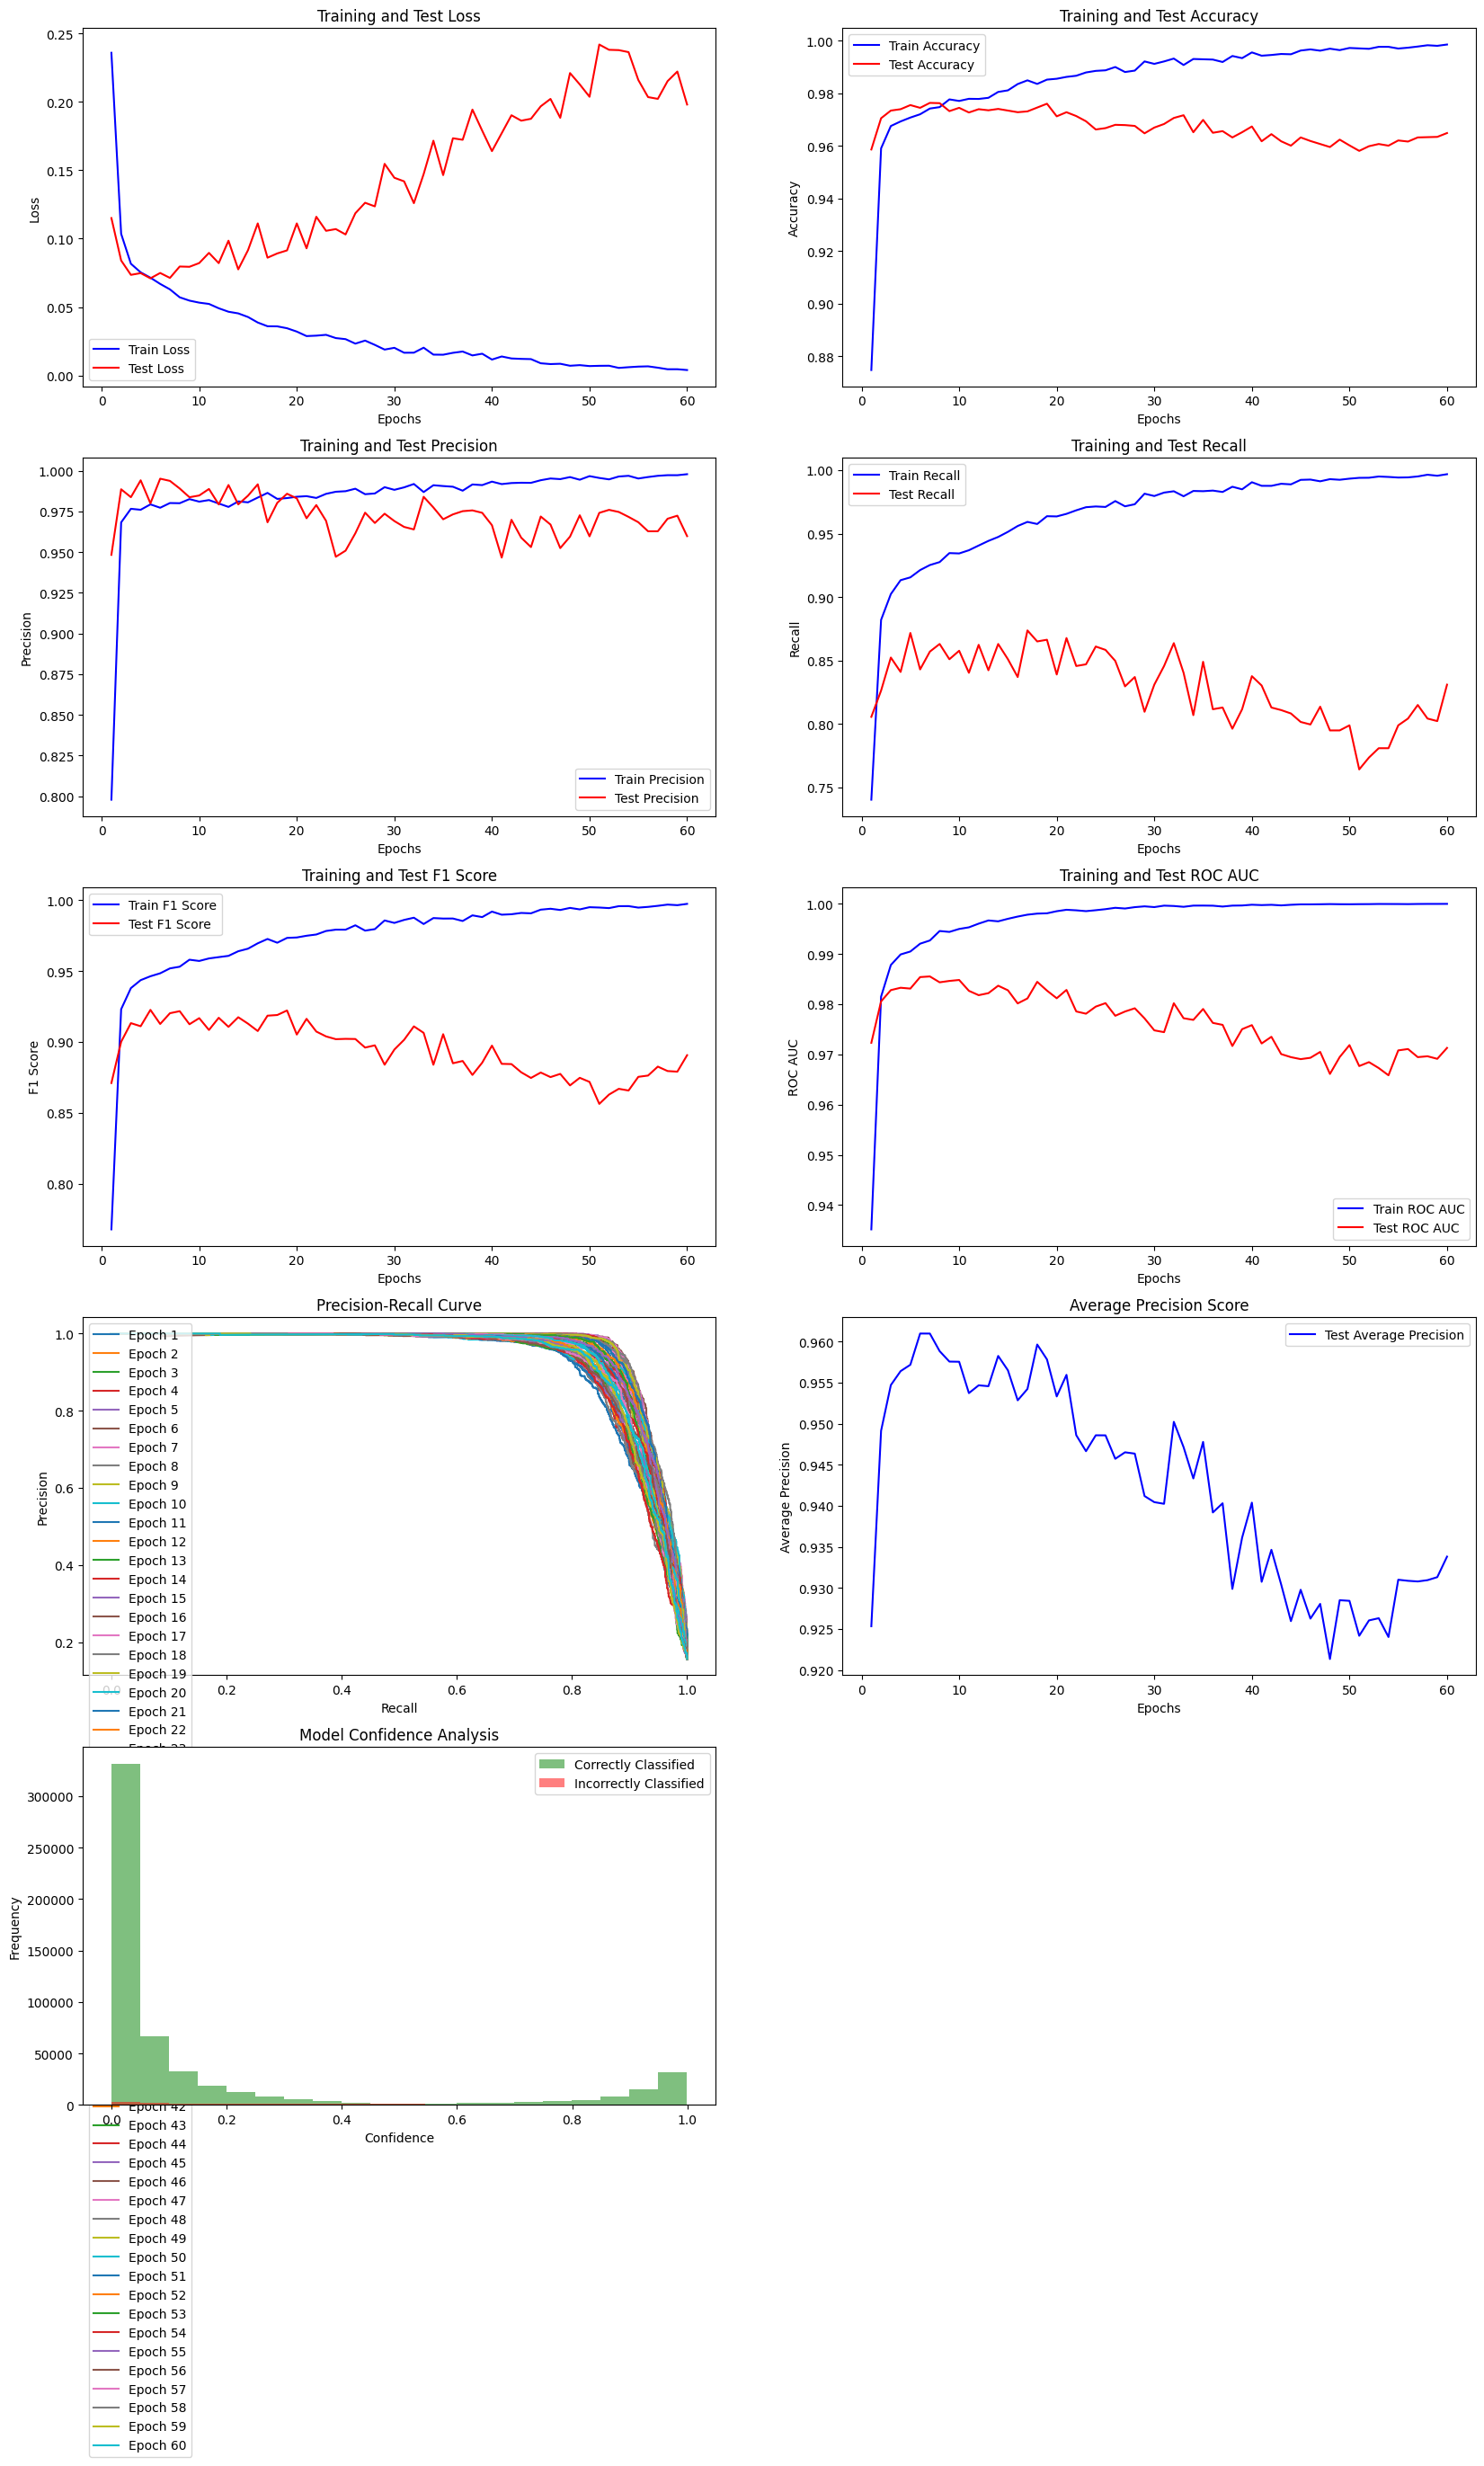

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_5.jpeg


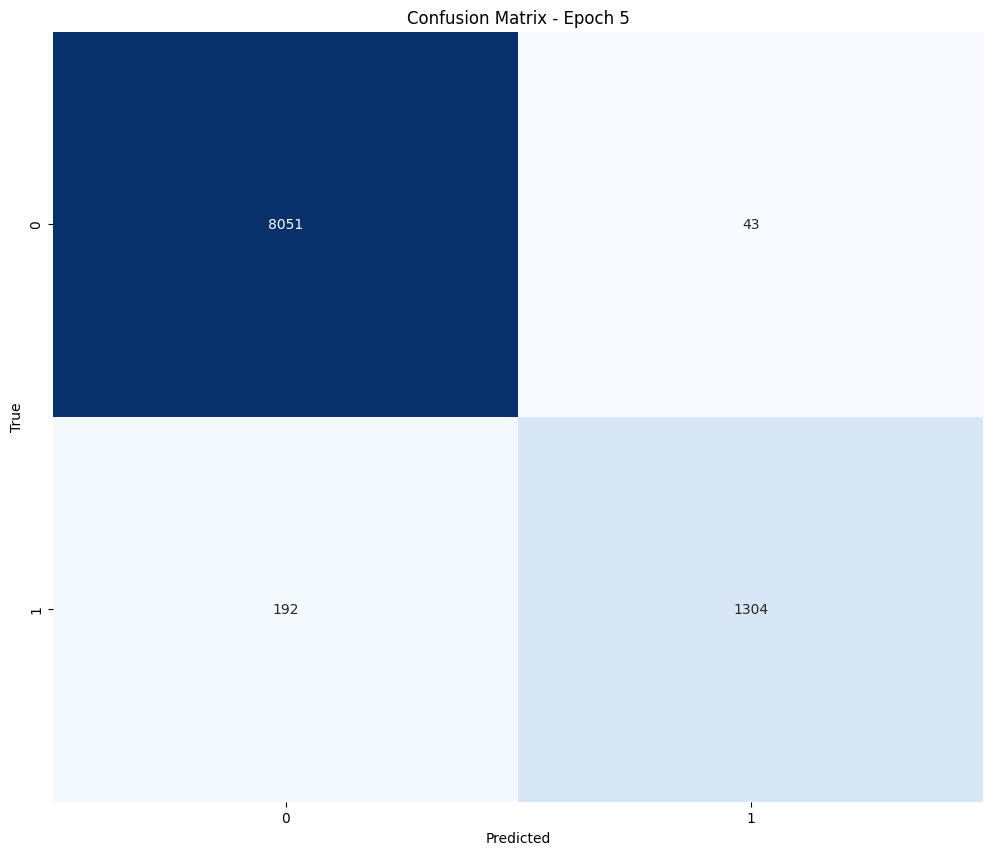

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_10.jpeg


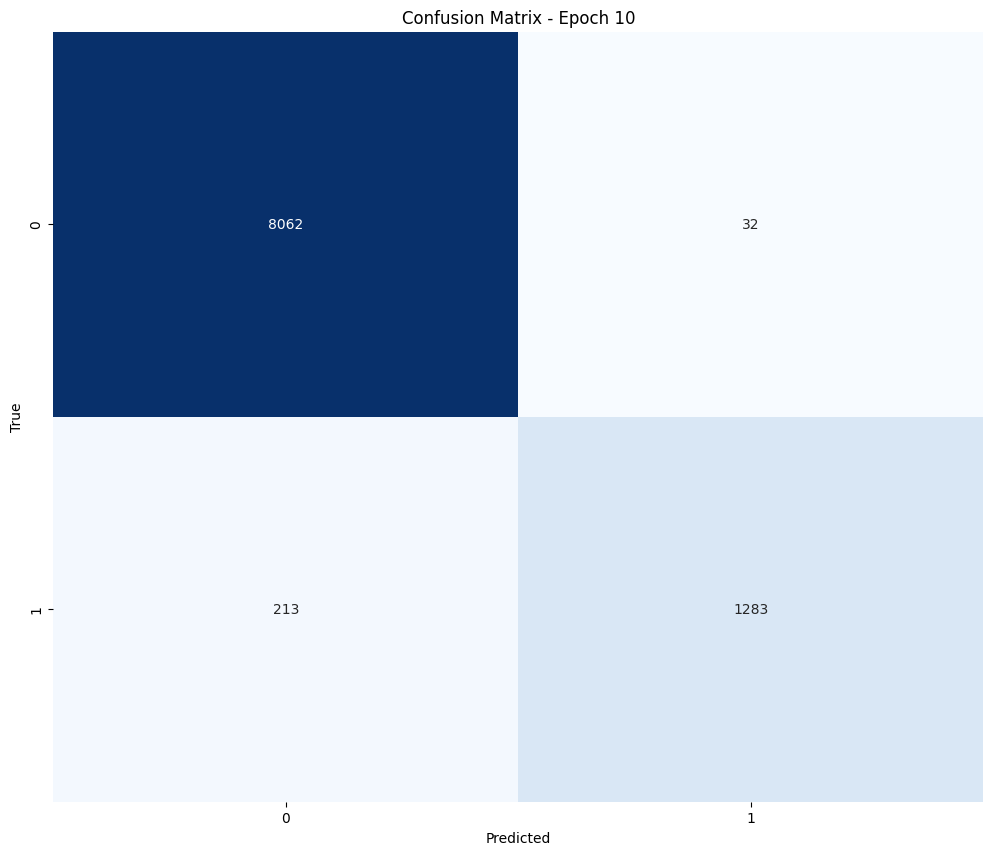

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_15.jpeg


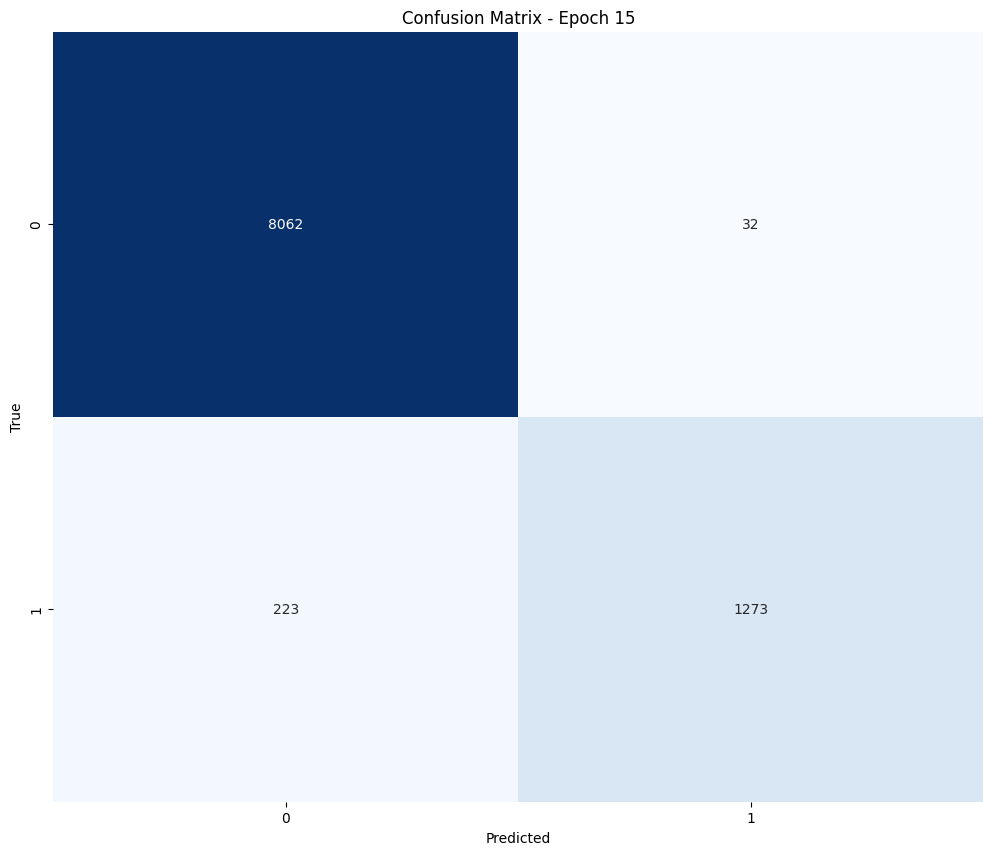

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_20.jpeg


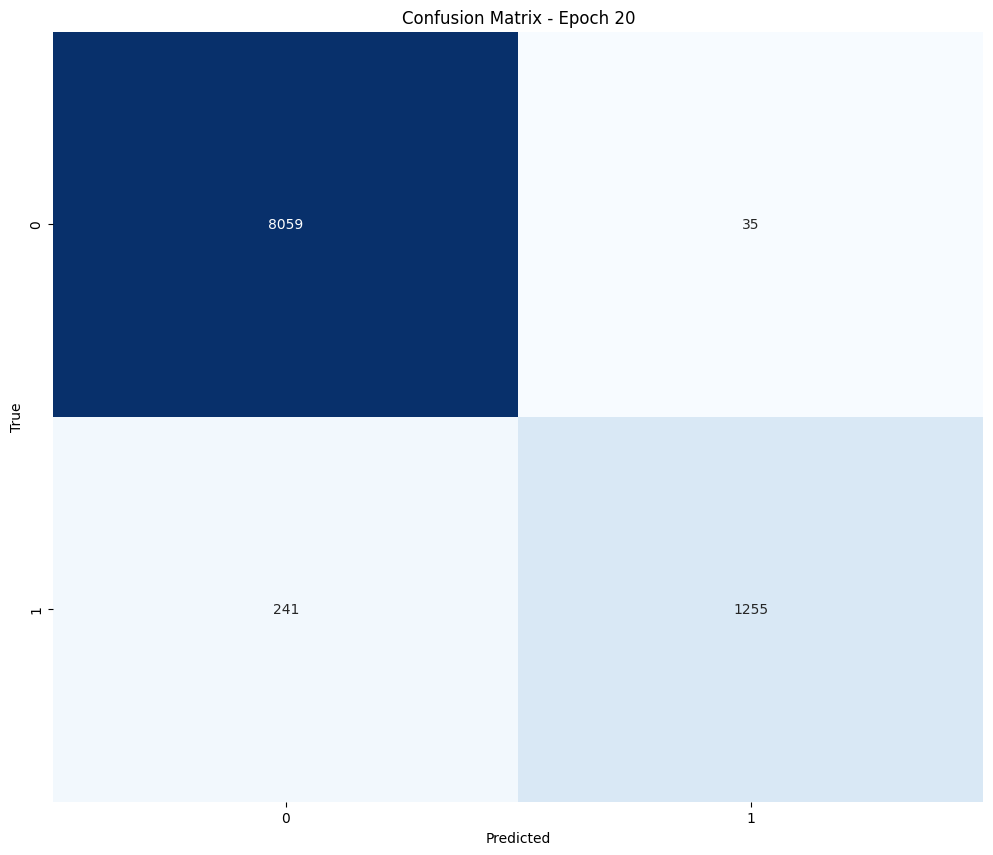

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_25.jpeg


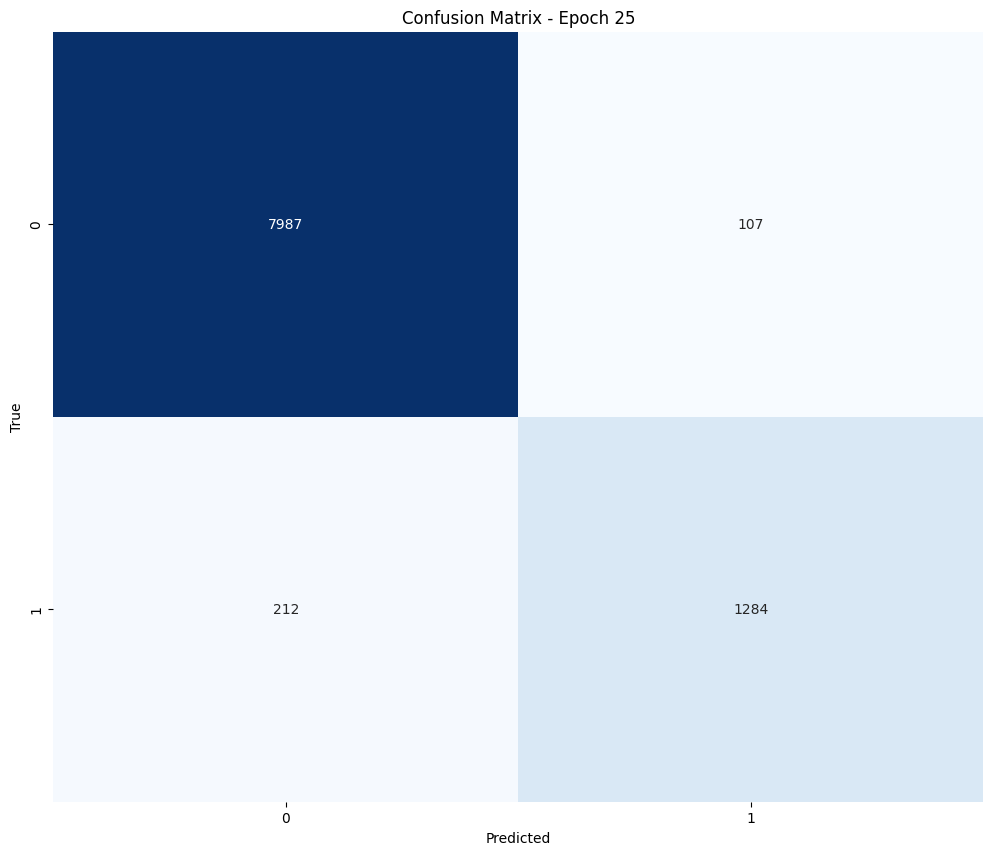

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_30.jpeg


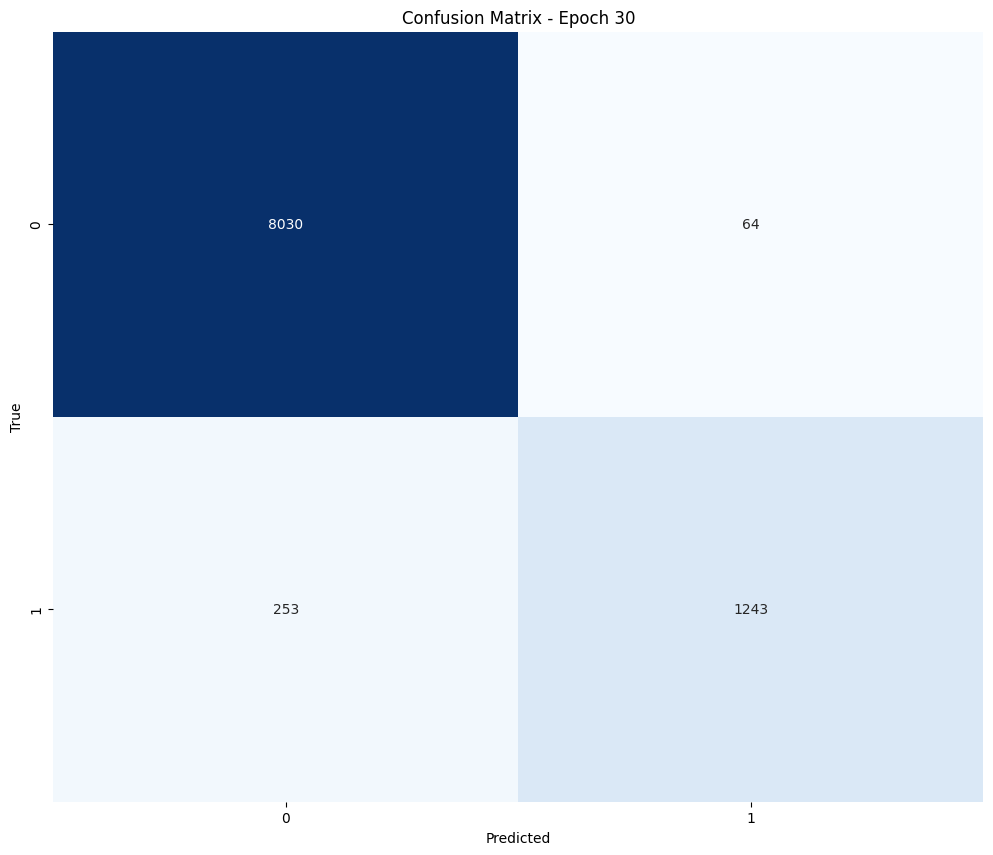

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_35.jpeg


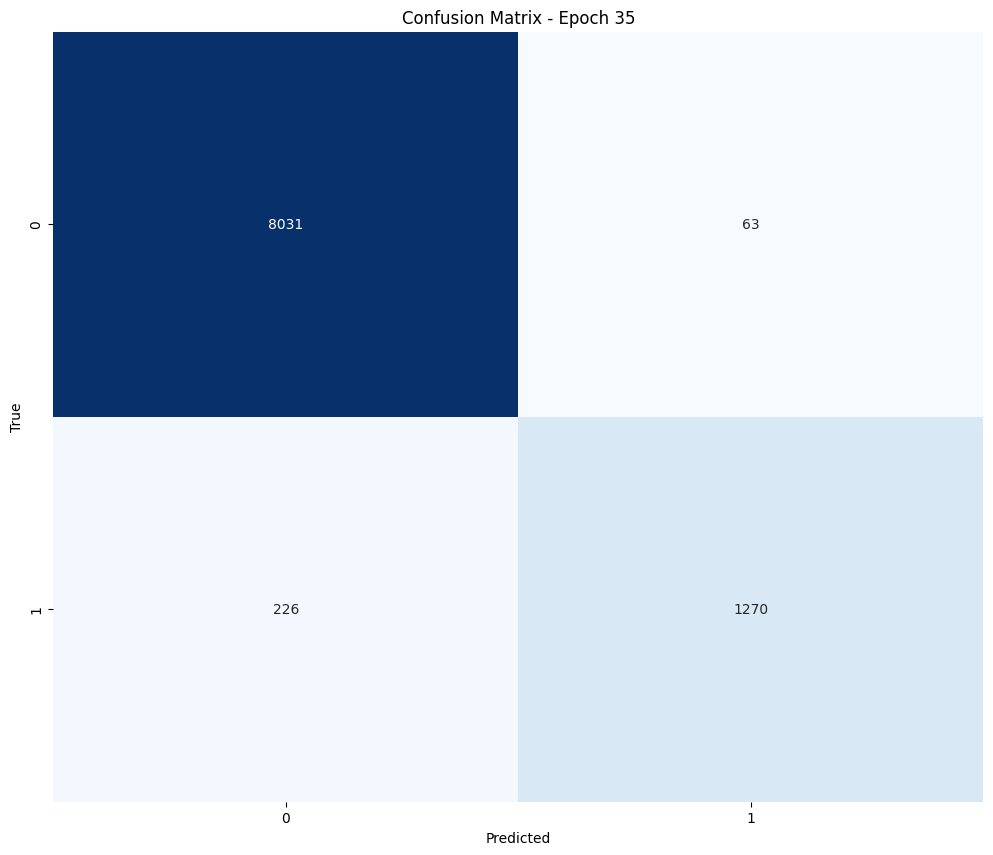

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_40.jpeg


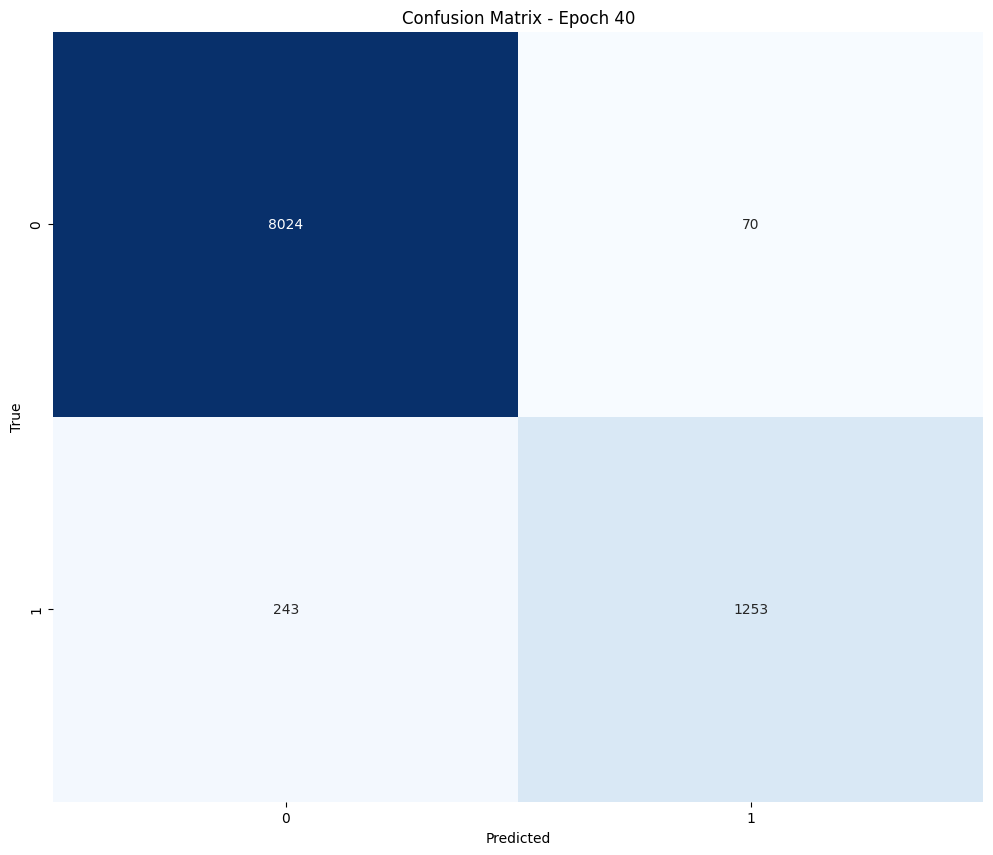

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_45.jpeg


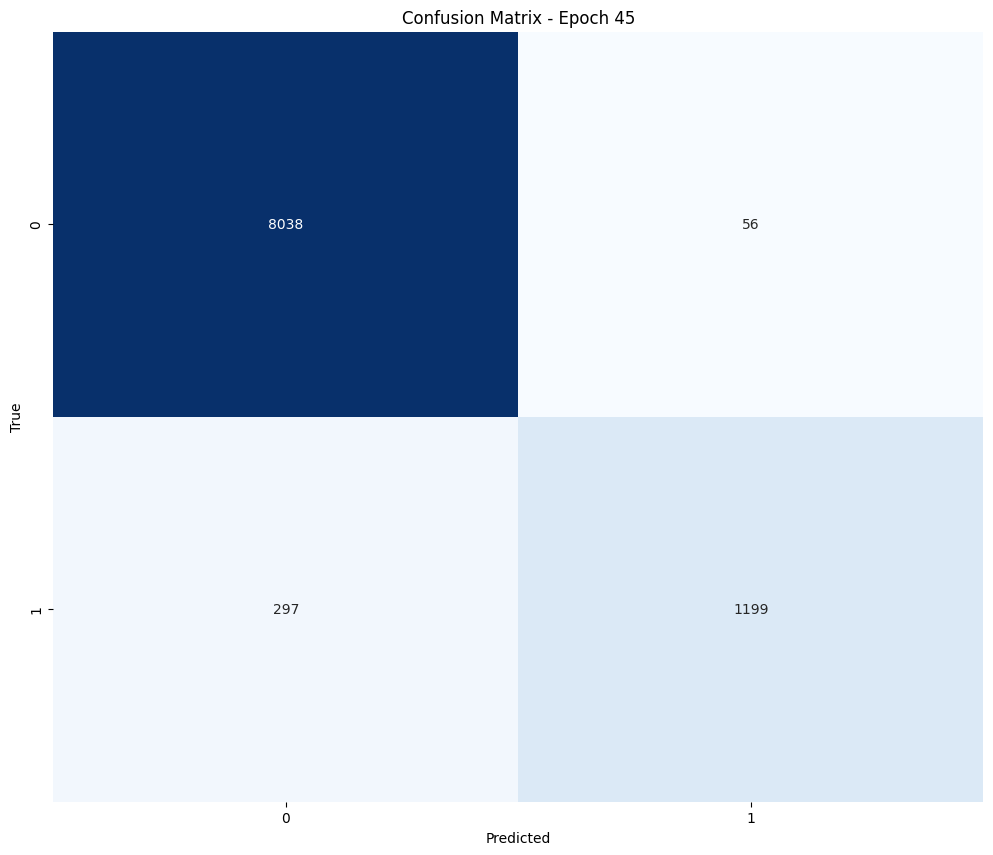

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_50.jpeg


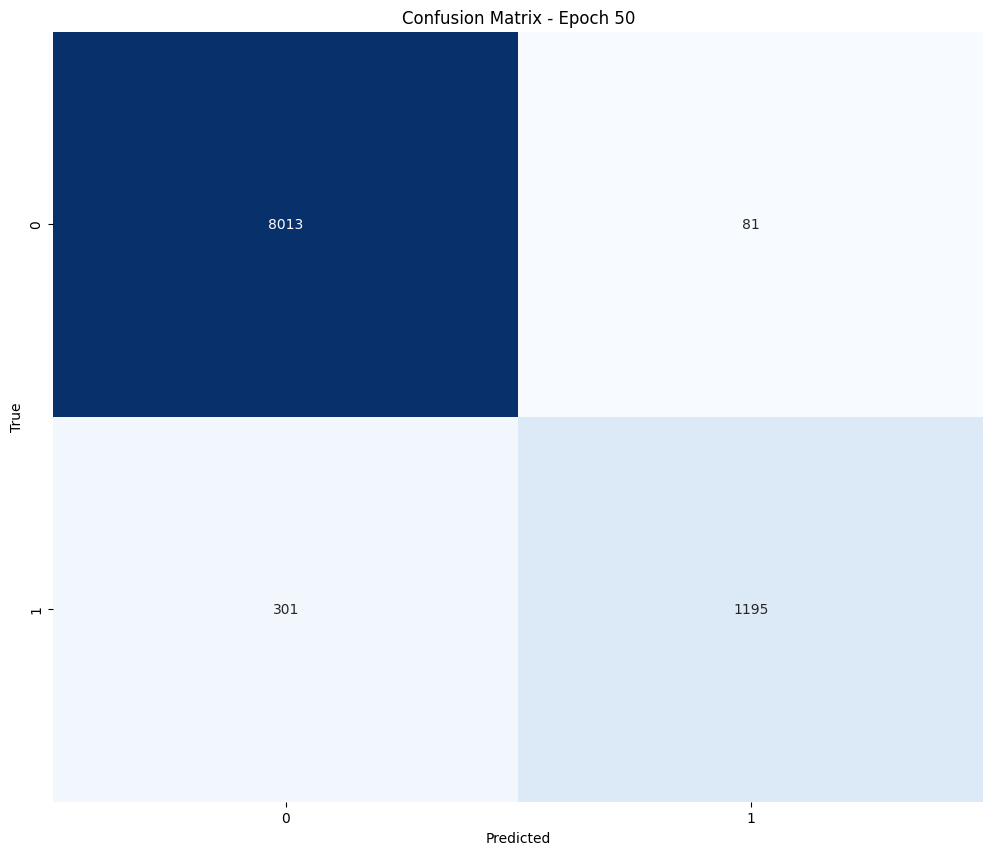

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_55.jpeg


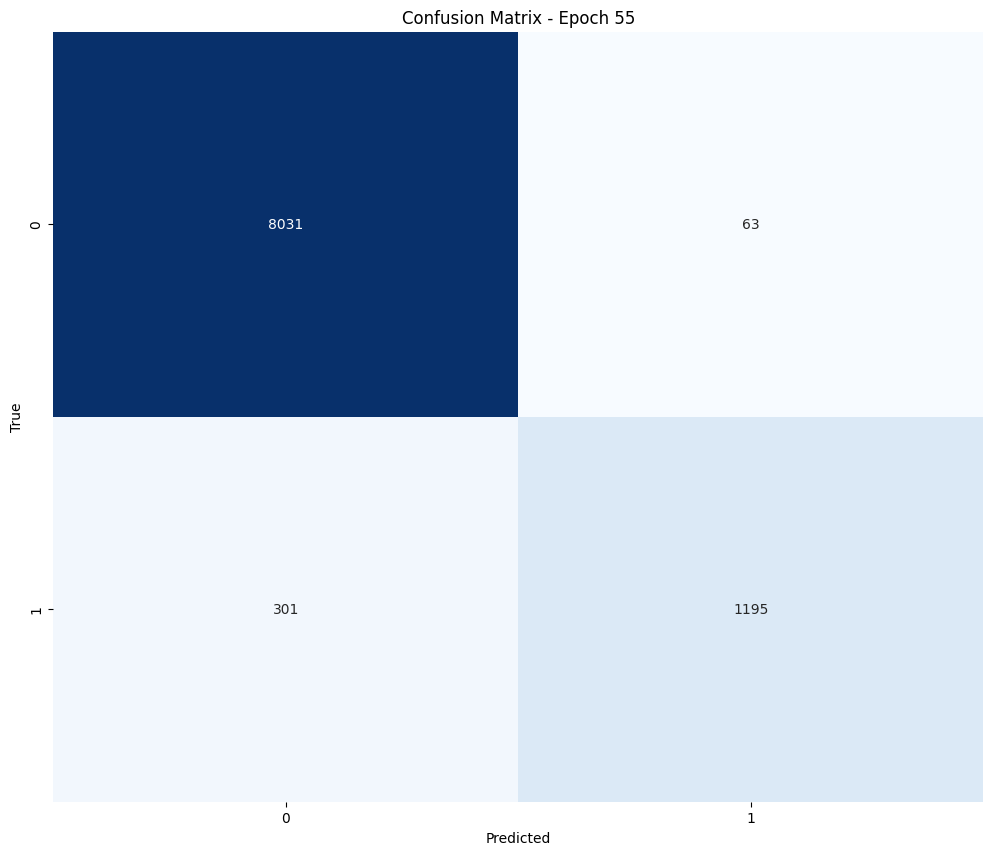

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_60.jpeg


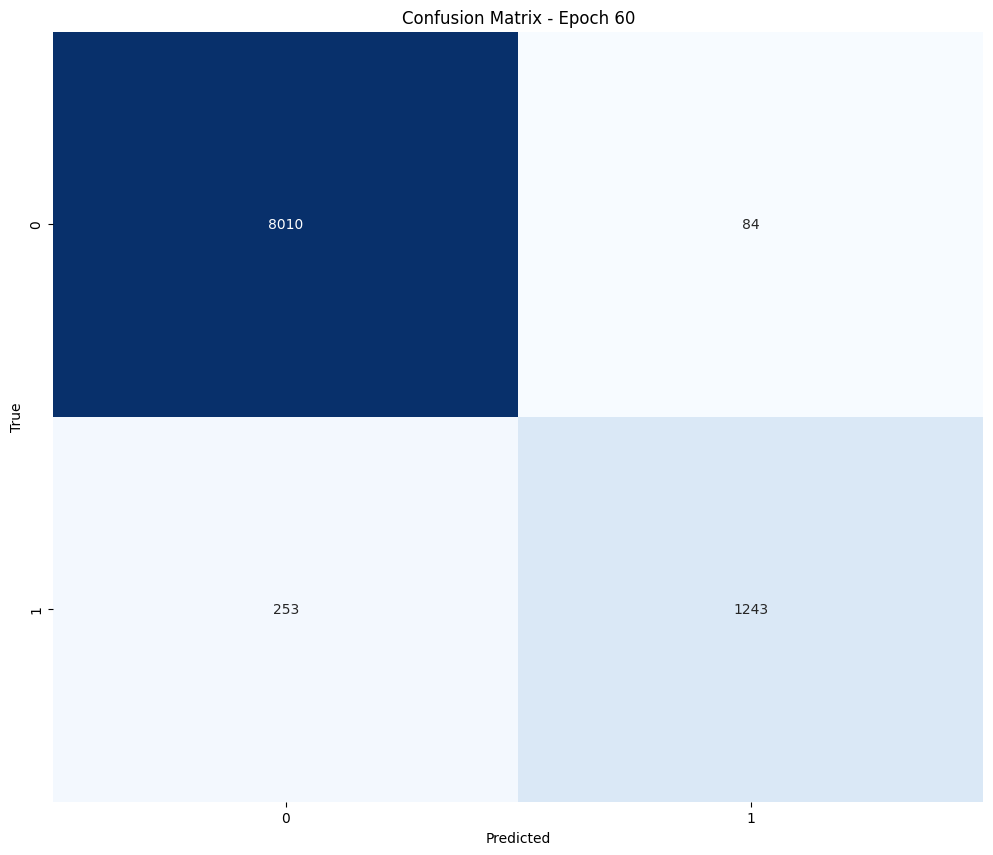

In [23]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Ensure you have tqdm imported

def plot_combined_metrics(H_pass1, H_pass2):
    # Combine metrics from Pass 1 and Pass 2
    combined_H = {}
    for key in H_pass1:
        combined_H[key] = H_pass1[key] + H_pass2[key]  # Concatenate metrics for Pass 1 and Pass 2
    
    # Number of epochs for combined training
    epochs = range(1, len(combined_H["train_loss"]) + 1)

    plt.figure(figsize=(20, 30))

    # Plot Training and Test Loss
    plt.subplot(5, 2, 1)
    plt.plot(epochs, combined_H["train_loss"], 'b', label='Train Loss')
    plt.plot(epochs, combined_H["test_loss"], 'r', label='Test Loss')
    plt.title('Training and Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Training and Test Accuracy
    plt.subplot(5, 2, 2)
    plt.plot(epochs, combined_H["train_acc"], 'b', label='Train Accuracy')
    plt.plot(epochs, combined_H["test_acc"], 'r', label='Test Accuracy')
    plt.title('Training and Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Training and Test Precision
    plt.subplot(5, 2, 3)
    plt.plot(epochs, combined_H["train_precision"], 'b', label='Train Precision')
    plt.plot(epochs, combined_H["test_precision"], 'r', label='Test Precision')
    plt.title('Training and Test Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()

    # Plot Training and Test Recall
    plt.subplot(5, 2, 4)
    plt.plot(epochs, combined_H["train_recall"], 'b', label='Train Recall')
    plt.plot(epochs, combined_H["test_recall"], 'r', label='Test Recall')
    plt.title('Training and Test Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()

    # Plot Training and Test F1 Score
    plt.subplot(5, 2, 5)
    plt.plot(epochs, combined_H["train_f1"], 'b', label='Train F1 Score')
    plt.plot(epochs, combined_H["test_f1"], 'r', label='Test F1 Score')
    plt.title('Training and Test F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()

    # Plot Training and Test ROC AUC
    plt.subplot(5, 2, 6)
    plt.plot(epochs, combined_H["train_roc_auc"], 'b', label='Train ROC AUC')
    plt.plot(epochs, combined_H["test_roc_auc"], 'r', label='Test ROC AUC')
    plt.title('Training and Test ROC AUC')
    plt.xlabel('Epochs')
    plt.ylabel('ROC AUC')
    plt.legend()

    # Plot Precision-Recall Curve for each epoch (from Pass 1 and Pass 2)
    plt.subplot(5, 2, 7)
    for i, (precision, recall) in enumerate(combined_H["test_precision_recall_curve"]):
        plt.plot(recall, precision, label=f'Epoch {i+1}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    # Plot Average Precision Score
    plt.subplot(5, 2, 8)
    plt.plot(epochs, combined_H["test_average_precision"], 'b', label='Test Average Precision')
    plt.title('Average Precision Score')
    plt.xlabel('Epochs')
    plt.ylabel('Average Precision')
    plt.legend()
    
    # Confidence Analysis Visualization
    plt.subplot(5, 2, 9)
    plt.hist(combined_H["correct_confidences"], bins=20, alpha=0.5, label='Correctly Classified', color='g')
    plt.hist(combined_H["incorrect_confidences"], bins=20, alpha=0.5, label='Incorrectly Classified', color='r')
    plt.xlabel('Confidence')
    plt.ylabel('Frequency')
    plt.title('Model Confidence Analysis')
    plt.legend()

    plt.tight_layout()

    # Save the plot with higher DPI for better quality
    plot_filename = os.path.join(PLOT_PATH, "model_metrics_plot.jpeg")
    plt.savefig(plot_filename, format='jpeg', dpi=300)
    print(f"Plot saved to {plot_filename}")

    # Display the plot in the notebook
    plt.show()  # Show the plot in the notebook

    plt.close()  # Ensure the plot is cleared after saving to avoid showing it blank

    # Plot Confusion Matrices every 5 epochs
    for i, cm in enumerate(combined_H["confusion_matrices"]):
        if (i + 1) % 5 == 0:  # Plot every 5 epochs
            plt.figure(figsize=(12, 10))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
            plt.title(f'Confusion Matrix - Epoch {i+1}')
            plt.xlabel('Predicted')
            plt.ylabel('True')

            # Save confusion matrix plots
            cm_filename = os.path.join(PLOT_PATH, f"confusion_matrix_epoch_{i+1}.jpeg")
            plt.savefig(cm_filename, format='jpeg', dpi=300)
            print(f"Confusion Matrix saved to {cm_filename}")

            plt.show()  # Show confusion matrix in the notebook
            plt.close()  # Close the plot to avoid memory issues

# Function call to plot the combined metrics
plot_combined_metrics(H_pass1, H_pass2)


# interactive visual comparison for predictions


In [24]:
import pandas as pd
import torch
import random
import matplotlib.pyplot as plt
from torchvision import transforms

# Load the test CSV to get metadata information (only used for loading purposes, not during visualization)
def load_metadata(csv_path):
    return pd.read_csv(csv_path)

# Define Function for Interactive Visual Comparison of 20 Random Images
def interactive_visual_comparison(model, test_loader, device):
    model.eval()
    all_images = []
    all_targets = []
    all_preds = []
    transform_back = transforms.ToPILImage()

    with torch.no_grad():
        for images, metadata, targets in test_loader:  # Removed 'image_names' from the DataLoader
            images, metadata = images.to(device), metadata.to(device)
            targets = targets.to(device)
            
            # Make predictions
            outputs = model(images, metadata)
            preds = torch.sigmoid(outputs).round()  # Convert logits to binary predictions (0 or 1)
            
            # Store images, targets, and predictions
            all_images.extend(images.cpu().detach())
            all_targets.extend(targets.cpu().detach().numpy())
            all_preds.extend(preds.cpu().detach().numpy())
    
    # Randomly select 20 samples
    indices = random.sample(range(len(all_images)), 20)
    
    plt.figure(figsize=(20, 40))
    for i, idx in enumerate(indices):
        original_label = "malignant" if all_targets[idx] == 1 else "benign"
        predicted_label = "malignant" if all_preds[idx] == 1 else "benign"

        # Convert image tensor back to PIL image
        img = transform_back(all_images[idx])
        
        # Plot the image and prediction details
        plt.subplot(10, 2, i + 1)  # Corrected the subplot number
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Original: {original_label}\nPredicted: {predicted_label}")
        
    plt.tight_layout()
    plt.show()



# lesion predictions


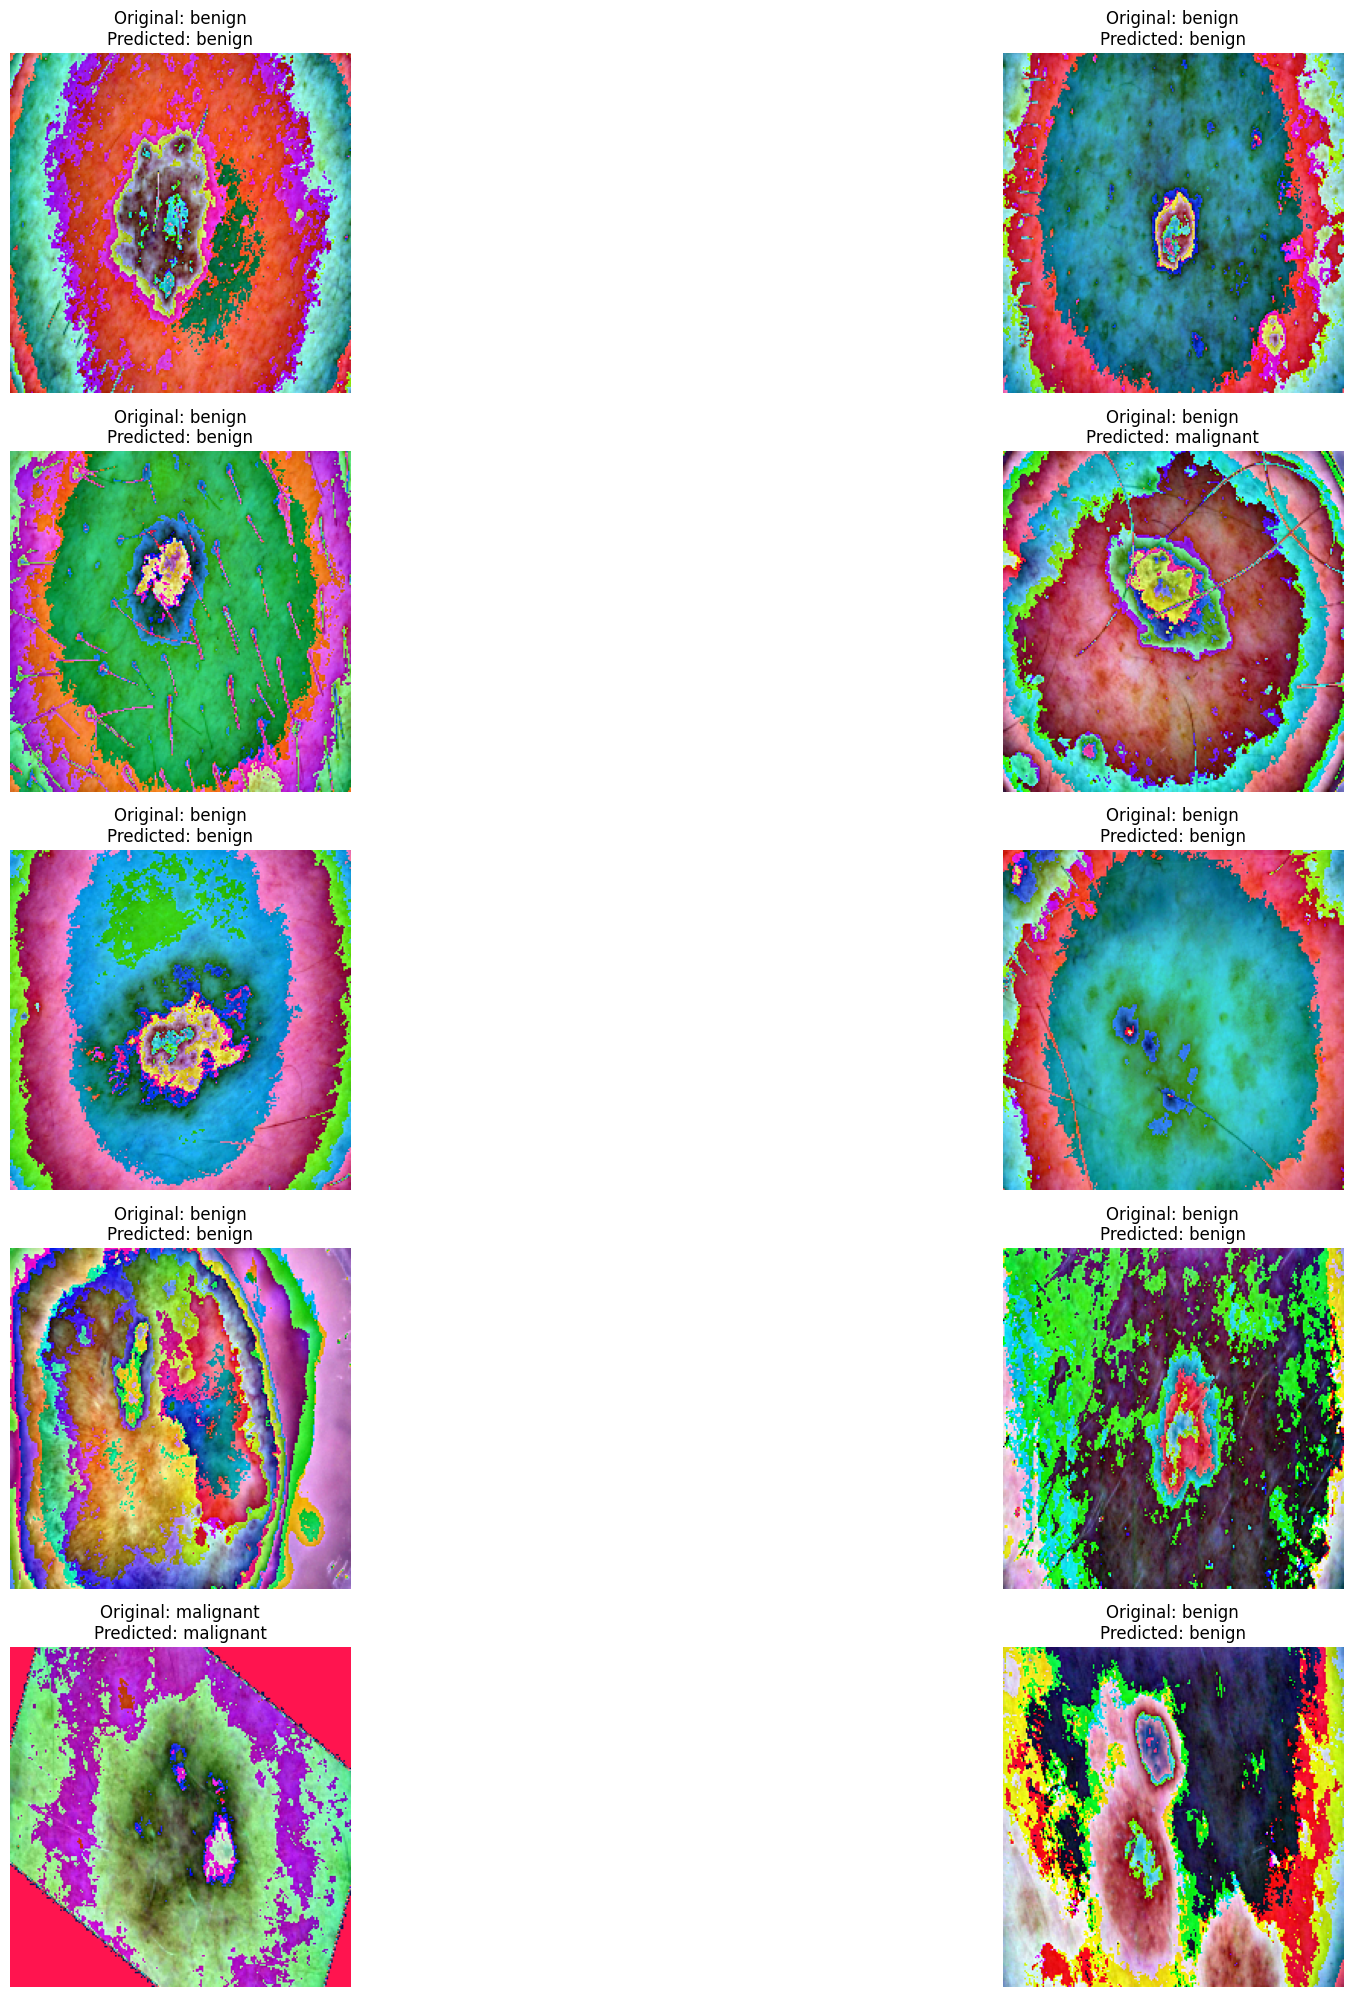

In [25]:
TEST_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'test_split.csv')
test_metadata_df = LesionPredictions.load_metadata(TEST_CSV_PATH)

# Make sure to define 'model', 'test_loader', and 'DEVICE'
visualizer = LesionPredictions(model, test_loader, DEVICE)
visualizer.inference_prediction()

# GUI based tool making predictions

In [1]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
import os
import torch
import pandas as pd
from torchvision import transforms
from PIL import Image
from resnet_model import ResNetModel  # Import your ResNet model class

# Define the device to run the model on
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model
def load_model(model_path):
    # Initialize model
    num_metadata_features = 3  # Update based on your model's requirements
    model = ResNetModel(num_metadata_features).to(DEVICE)
    model.load_state_dict(torch.load(model_path))
    model.eval()  # Set the model to evaluation mode
    return model

# Prediction function
def predict(image_path, metadata):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(DEVICE)  # Add batch dimension and move to device
    sex_encoded = metadata['sex']
    age = metadata['age']
    site_encoded = metadata['site']
    input_metadata = torch.tensor([sex_encoded, age, site_encoded], dtype=torch.float).unsqueeze(0).to(DEVICE)  # Add batch dimension and move to device

    with torch.no_grad():
        output = model(image, input_metadata)
        prediction = torch.sigmoid(output).item()
        return "Malignant" if prediction >= 0.5 else "Benign", prediction

# Function to load image and metadata
def load_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        # Display selected image in the GUI
        img_label.config(text=os.path.basename(file_path))
        processing_label.config(text="Processing...")

        # Extract metadata from the CSV files
        metadata = extract_metadata(os.path.basename(file_path))

        if metadata:
            # Perform prediction
            prediction, confidence = predict(file_path, metadata)
            result_label.config(text=f"Prediction: {prediction} (Confidence: {confidence:.2f})")
            processing_label.config(text="")
        else:
            messagebox.showerror("Error", "Metadata not found for the selected image.")

# Extract metadata from the CSV files
def extract_metadata(image_name):
    for csv_file in [TRAIN_CSV_PASS1, TRAIN_CSV_PASS2, TEST_CSV_PATH]:
        df = pd.read_csv(csv_file)
        row = df[df['image_name'] == image_name]
        if not row.empty:
            return {
                'sex': row['sex'].values[0],
                'age': row['age_approx'].values[0],
                'site': row['anatom_site_general_challenge'].values[0]
            }
    return None

# Create the main window
root = tk.Tk()
root.title("Skin Lesion Classification Tool")

# Transform for image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the trained model
BASE_DIR = "/home/hifis/hifis0010"
MODEL_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Thesis_Code', 'Enhanced-Skin-Lesion-detection-using-Deep-Learning-model', 'results', 'output', 'melanoma_trained_model.pth')
model = load_model(MODEL_PATH)

# UI Elements
load_button = tk.Button(root, text="Load Image", command=load_image)
load_button.pack()

img_label = tk.Label(root, text="")
img_label.pack()

processing_label = tk.Label(root, text="")
processing_label.pack()

result_label = tk.Label(root, text="")
result_label.pack()

# Logo - replace 'path_to_logo' with the actual path to your logo image
logo_path = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Thesis_Code', 'Enhanced-Skin-Lesion-detection-using-Deep-Learning-model', 'results', 'uds.jpg')
logo = Image.open(logo_path)
logo = logo.resize((220, 150), Image.ANTIALIAS)
logo_image = tk.PhotoImage(logo)
logo_label = tk.Label(root, image=logo_image)
logo_label.pack()

# Run the main loop
root.mainloop()


TclError: no display name and no $DISPLAY environment variable